#**librerias**

In [ ]:
#Librerias
import re
import numpy as np
import pandas as pd
import pandas_profiling
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
nltk.download('stopwords')
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
import unicodedata
from es_lemmatizer import lemmatize
import spacy
import re
import pyodbc
import prince

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\estduclui\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#**Rutas**

In [ ]:
observador_personal  = Path('C:/Users/estduclui/Documents/ECOPETROL- TA/Entendimiento de los datos/Observaciones_LimpiezaInicial_Personal.csv')

#**Funciones**

In [ ]:
#esta funcion quita stop words de cada una de las filas
def text_rows(texto, StopWords):
    texto = texto.split()
    resultwords  = [word for word in texto if word not in StopWords]
    texto = ' '.join(resultwords)
    return texto


def text (column, dic):
    column = column.astype(str)
    texto_base = " ".join(motivo for motivo in column)
    text = (unicodedata.normalize('NFKD', texto_base).encode('ascii', 'ignore').decode('utf-8', 'ignore').lower())
    text = re.sub(r"\bmedicas\b","medica",text)
    for i, j in dic.items():
        text = text.replace(i, j)
        
    return text
    
def listas (column, dic):
    Lista = []
    column = columna.astype(str)
    for motivo in column:
        inicial_answer = str(motivo)
        for i, j in dic.items():
            ini_answer = inicial_answer.replace(i, j)
        answer = (unicodedata.normalize('NFKD', ini_answer).encode('ascii', 'ignore').decode('utf-8', 'ignore').lower())
        answer = re.sub(r"\bmedicas\b","medica",answer)
        answer = re.sub(r"\bmedicamentos\b","medicamento",answer)
        answer = re.sub(r'[^\w\s]','', answer).split()
        words = [word for word in answer if word not in stop_words]
        Lista.append(words)
    return Lista
    
#crea nube de palabras
def wordcloud(text, nombre, stopWords):
    wordcloud = WordCloud(stopwords=stop_words+stopWords, background_color="white", width=1600, height=800,min_word_length =3 ).generate(text)
    plt.figure( figsize=(15,10) )
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    plt.savefig("word_cloud_"+str(nombre)+".png") #dpi = 300)    

#crea n-gramas   
def ngrams(text, n, top,stopWords):
    #wnl = nltk.stem.WordNetLemmatizer()
    texto = re.sub(r'[^\w\s]','', text).split()
    stopwords = stop_words + stopWords
    words = [word for word in texto if word not in stopwords]
    
    n_grams_series = ((pd.Series(nltk.ngrams(words,n)).value_counts())[:top])
    plot = n_grams_series.sort_values().plot.barh(color ="tomato", width = 0.6, figsize = (20,18), edgecolor='grey')   #color=(0.2, 0.4, 0.6, 0.6)
    plot.set_xlabel('Frecuencia',  fontname="Calibri", fontsize=35)
    plot.set_title('TOP ' + str(top) +' de '+str(n)+'-GRAMAS QUE APARECEN CON MAYOR FRECUENCIA', fontname="Calibri", fontsize=40)
    plot.title.set_position([.5, 1.05])
    for tick in  plot.get_xticklabels():
        tick.set_fontname("Calibri")
        tick.set_fontsize(35)
    for tick in  plot.get_yticklabels():
        tick.set_fontname("Calibri")
        tick.set_fontsize(35)
    #plt.savefig("graph.png") #dpi = 300)
    plt.figure( figsize=(15,10) )
    #plt.show()
    return n_grams_series
    #if n == 1 :
    #    return n_grams_series.to_frame().reset_index().rename(columns = {'index':'palabras', 0:'Conteo'})
    #elif n == 2:
    #    return n_grams_series.to_frame().reset_index().rename(columns = {'index':'Bigramas', 0:'Conteo'})
    #elif n > 2:
    #    return n_grams_series.to_frame().reset_index().rename(columns = {'index':'gramas', 0:'Conteo'})



#**STOPWORDS**

In [ ]:
#nombres
filename = "nombres_apellidos.txt"
with open(filename) as f:
    nombres = f.readlines()
# you may also want to remove whitespace characters like `\n` at the end of each line
nombres = [x.strip() for x in nombres] 

#Stopwords en general

GENERAL_STOPWORDS = []


#lista base
stop_words = nltk.corpus.stopwords.words('spanish') + ADDITIONAL_STOPWORDS + nombres


# **Extraccion observaciones**

In [ ]:
beneficios = pd.read_csv(observador_personal)
beneficios.head()

fgs_IdGestion                                         fgs_Nivel3  \
0       13908445  Legal / Reconocimiento Pensionados (Incluye Su...   
1       13908527  Legal / Reconocimiento Pensionados (Incluye Su...   
2       13908581  Legal / Reconocimiento Pensionados (Incluye Su...   
3       13908589  Legal / Reconocimiento Pensionados (Incluye Su...   
4       13908640  Legal / Reconocimiento Pensionados (Incluye Su...   

                       ObservacionCreacion_limpieza1  \
0  se recibe documentacion del senor joaquin erne...   
1  solicito el ajuste de semestre y se encuentra ...   
2  se recibe solicitud de legalizacion semestre s...   
3  solicitud del usuario ayer envie este mismo do...   
4  se recibe solicitud de legalizacion de luisa f...   

                       ObservacionSolucion_limpieza1  \
0   se informa que su caso no puede ser tramitado...   
1  se realizo el ajuste de semestre y se encuentr...   
2  se informa a la peticionaria que este caso fue...   
3  gestion realizada dando respuesta a la consult...   
4  se informa que debe anexar certificacion de un...   

   # palabras_ObsCreacion_sinLim  # palabras_ObsSolucion_sinLim  \
0                             18                            228   
1                             12                             13   
2                             20                             17   
3                             22                            250   
4                             10                             27   

   # palabras_ObsCreacion_limpieza1  # palabras_ObsSolucion_limpieza1  
0                                18                               238  
1                                12                                13  
2                                18                                16  
3                                25                               247  
4                                10                                27

## **GRUPOS**

In [ ]:
GRUPOS = ['1. Legalización','1. Legalización','2. Solicitud de educación inclusiva'
          ,'3. Anticipo','3. Anticipo','3. Anticipo','3. Anticipo'
          ,'4. Consulta','4. Consulta','4. Consulta','4. Consulta','4. Consulta'
          ,'4. Consulta','4. Consulta','5. Soporte Plataforma'
          ,'6. Reintegro','6. Reintegro','7. Inscripción','7. Inscripción','7. Inscripción']

NIVELES = ['Legal / Reconocimiento Pensionados (Incluye Sustitutos)'
           ,'Legal / Reconocimiento Trabajadores (Incluye Bachiller ECP)'
           ,'Solicitud de educación inclusiva'
           ,'Anticipo Pensionados Educación Inclusiva','Anticipo Trabajadores Educación Inclusiva'
            ,'Anticipo Pensionados (Incluye Sustitutos)','Anticipo Trabajadores (Incluye BXC)'
            ,'Consulta Bachiller Ecopetrol (Incapacidad médica y/o Fuerza Mayor)'
            ,'Consulta de información relacionadas con reembolsos'
            ,'Consulta especialista beneficios atención PQRS'
            ,'Consulta sobre liquidación/pago préstamo para educación'
            ,'Consulta Titulares Beneficio Eductivo - Desvinculados'
            ,'Consultas Titulares Beneficio Educativo (No Incluye Bachiller ECP)'
            ,'Solicitud / Consulta / revisión pagos colegios propiedad de Ecopetrol S.A.'
            ,'Soporte Plataforma para Instituciones Educativas vía TIB'
            ,'Reintegro de dinero Pensionados Educación (Incluye sustitutos y Auto)'
            ,'Reintegro de dinero trabajadores Educación (Incluye Bachiller ECP)'
            ,'Inscripción casos especiales comité de educación convencional activos'
            ,'Inscripción casos especiales comité educación convencional pensionados'
            ,'Inscripción solicitud becas Comité de Educación Convencional Activos']

dic_grupos = dict(zip(NIVELES,GRUPOS))

beneficios['GRUPOS'] = beneficios['fgs_Nivel3']
beneficios['GRUPOS'].replace(dic_grupos, inplace=True)

## **PALABRAS DEL DOCUMENTOS DE CARACTERIZACION**

In [ ]:
caracterizacion_palabras = pd.read_excel('Caracterizacion_inicial_palabras.xlsx', sheet_name = 'Beneficios-obsCreacion')
caracterizacion_palabras = caracterizacion_palabras.replace(regex= [r"\(", r"\),", r"\[", r"\]", r"\'", r","] , value="")
caracterizacion_palabras['Palabras '] = caracterizacion_palabras['Palabras '].str.strip()
caracterizacion_palabras.rename(columns = {'Palabras ':'StopWords'}, inplace = True)
caracterizacion_palabras['fgs_Nivel3'] = list(df_total['fgs_Nivel3'].unique())

# **NUBES DE PALABRAS Y NGRAMAS POR GRUPO**

In [ ]:
#**stopwords**

In [ ]:
stop_words_grupo = { '1. Legalización': []
                    , '2. Solicitud de educación inclusiva':[]
                    , '3. Anticipo': []
                    , '4. Consulta': []
                    , '5. Soporte Plataforma': []
                    , '6. Reintegro': []
                    , '7. Inscripción': []}

In [ ]:
#palabras obtenidas de la tabla de caracterizacion
StopWordGroups = str(caracterizacion_palabras['StopWords'].unique())
StopWordGroups = StopWordGroups.replace("[","").replace("'","").replace("\n","").replace("]","").replace(")","")#.replace(r"\)","").replace(r"\[","").replace(r"\]","").replace(r"'\n '","")
SW_grupos = StopWordGroups.split(' ')

dic = {}

In [ ]:
#SW_grupos

#**Remoción de stopwords**

In [ ]:
df_total = beneficios
#se crea columna con observaciones que se van a reducir
df_total['ObservacionCreacion_limpieza2'] = df_total['ObservacionCreacion_limpieza1']

for i in list(df_total['GRUPOS'].unique()):
        StopWords_total = stop_words_grupo[i] + stop_words
        df_total.loc[df_total['GRUPOS'] == i, 'ObservacionCreacion_limpieza2'] = df_total[df_total['GRUPOS'] == i].ObservacionCreacion_limpieza2.apply(lambda x : text_rows(x,StopWords_total))
df_total[['ObservacionCreacion_limpieza1', 'ObservacionCreacion_limpieza2']].head(5)

ObservacionCreacion_limpieza1  \
0  se recibe documentacion del senor joaquin erne...   
1  solicito el ajuste de semestre y se encuentra ...   
2  se recibe solicitud de legalizacion semestre s...   
3  solicitud del usuario ayer envie este mismo do...   
4  se recibe solicitud de legalizacion de luisa f...   

                       ObservacionCreacion_limpieza2  
0                         recibe documentacion senor  
1  solicito ajuste semestre encuentra proceso val...  
2  recibe solicitud semestre evidencia caso atend...  
3  solicitud usuario ayer envie mismo documento o...  
4                                   recibe solicitud

#**Nubes de palabras y enegramas**

1. LEGALIZACIÓN  Total Registros:  6610
  
Observaciones base
se recibe por parte de oficina virtual solicitud legalizacion plan educacional    169
solicita informacion de plan educacional                                          157
legalizacion plan educacional                                                     116
solicita informacion                                                              114
referente al caso requiere el estado de la solicitud                               44
Name: ObservacionCreacion_limpieza1, dtype: int64
  
Observaciones reducidas
solicita informacion                      307
recibe parte oficina virtual solicitud    169
                                          122
recibe solicitud                           80
requiere informacion reconocimiento        55
Name: ObservacionCreacion_limpieza2, dtype: int64


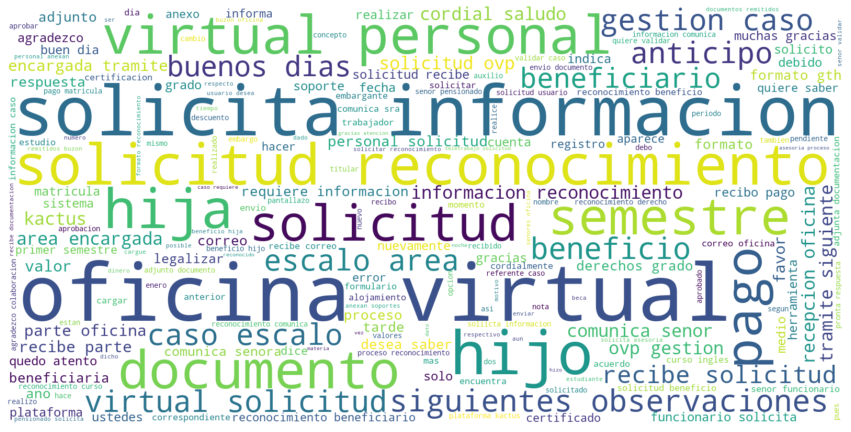

(oficina, virtual)             764
(solicita, informacion)        696
(solicitud, reconocimiento)    463
(virtual, personal)            406
(siguientes, observaciones)    318
(virtual, solicitud)           309
(caso, escalo)                 296
(escalo, area)                 294
(gestion, caso)                291
(buenos, dias)                 270
dtype: int64
(oficina, virtual, personal)            406
(oficina, virtual, solicitud)           309
(caso, escalo, area)                    293
(gestion, caso, escalo)                 275
(escalo, area, encargada)               247
(recepcion, oficina, virtual)           246
(tramite, siguientes, observaciones)    235
(encargada, tramite, siguientes)        235
(area, encargada, tramite)              235
(solicitud, ovp, gestion)               234
dtype: int64
(gestion, caso, escalo, area)                      275
(caso, escalo, area, encargada)                    247
(recepcion, oficina, virtual, personal)            246
(escalo, area, enca

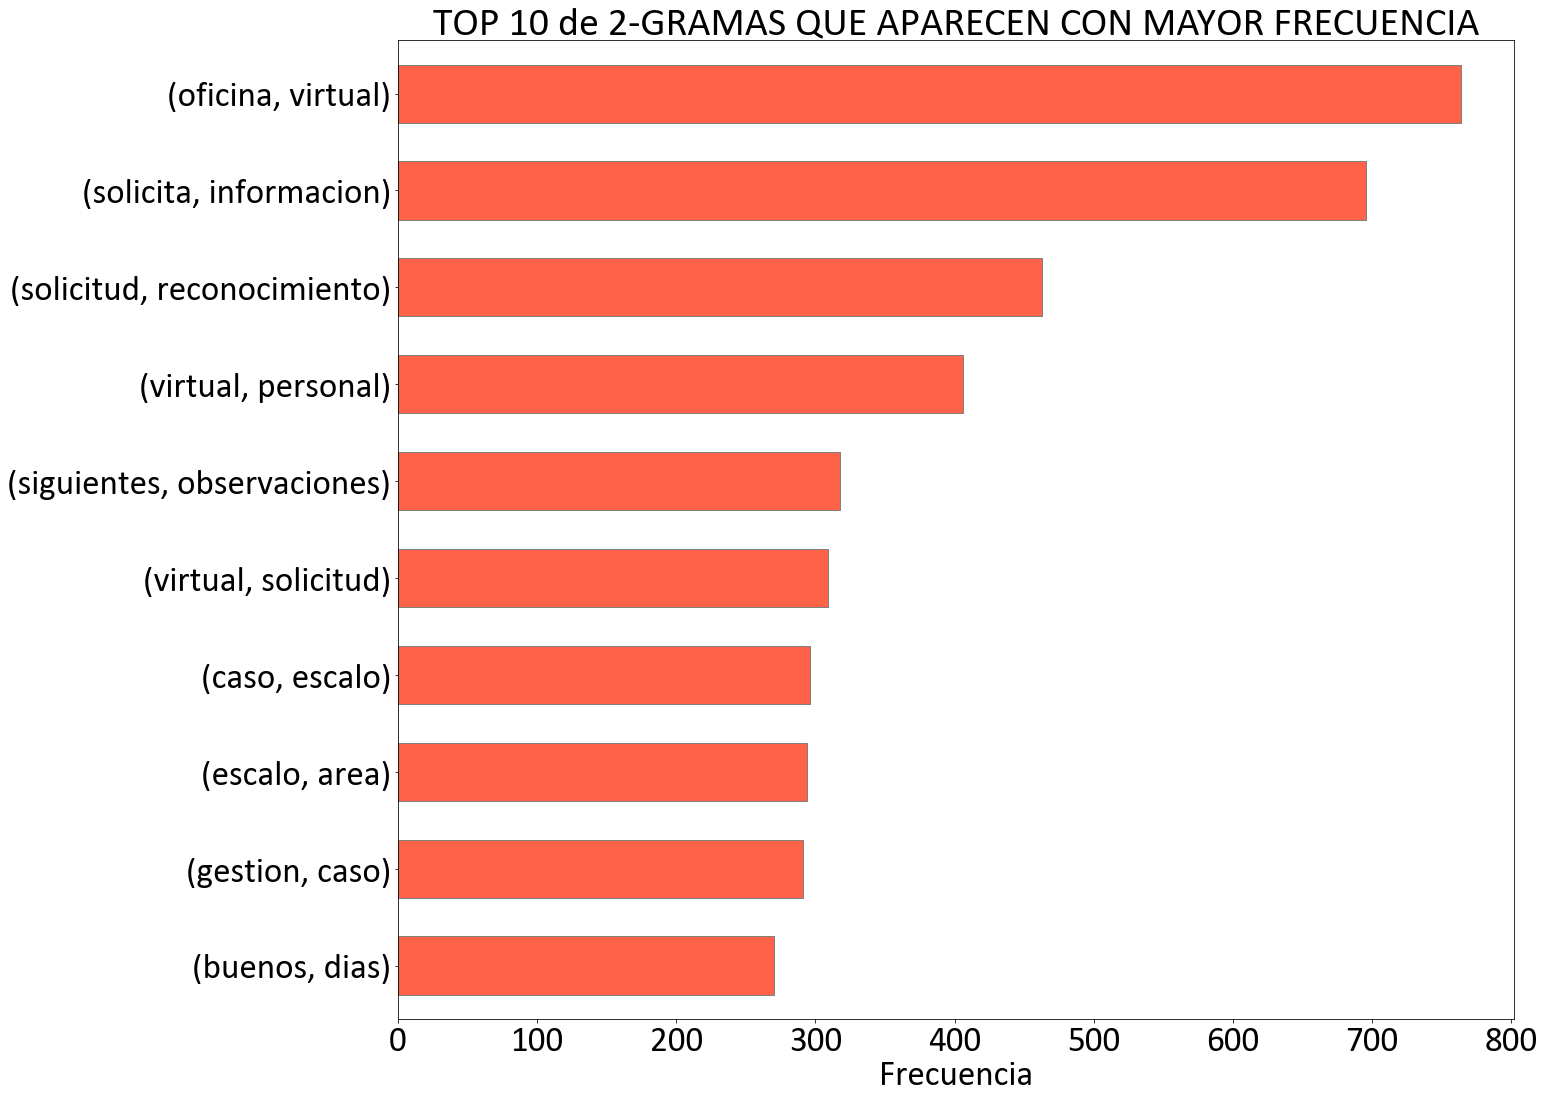

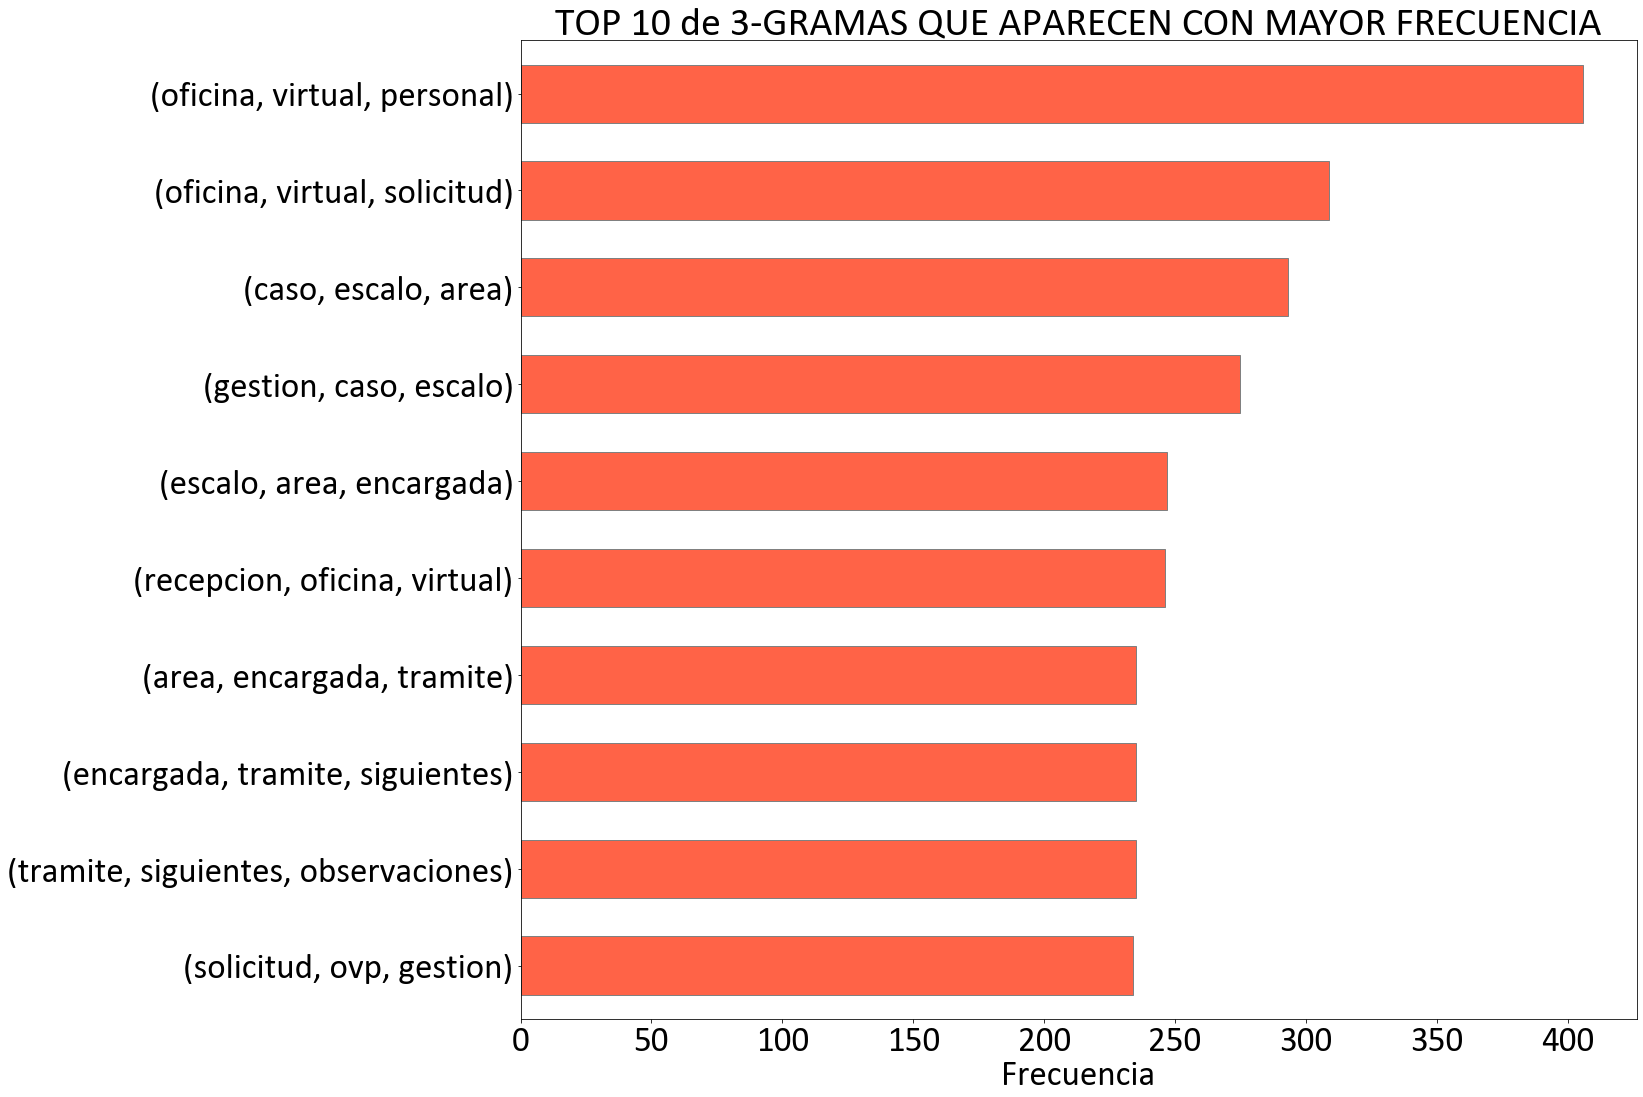

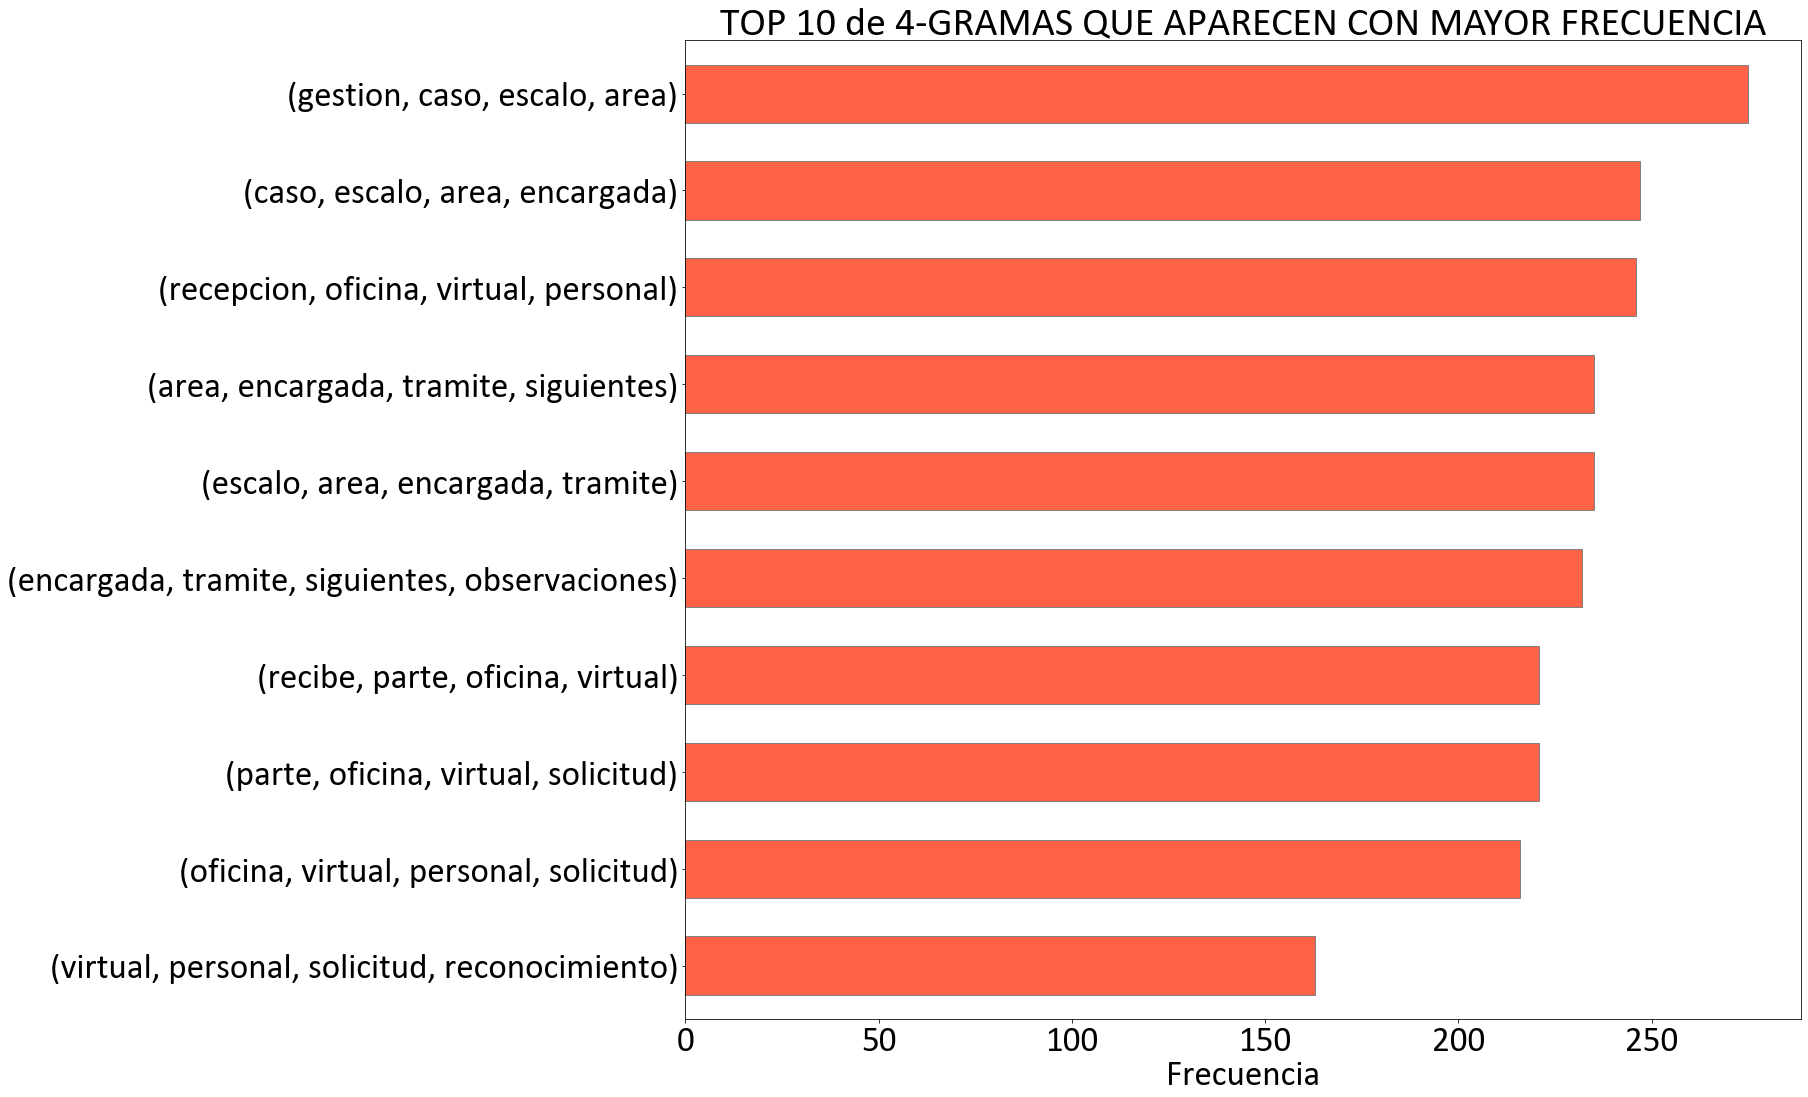

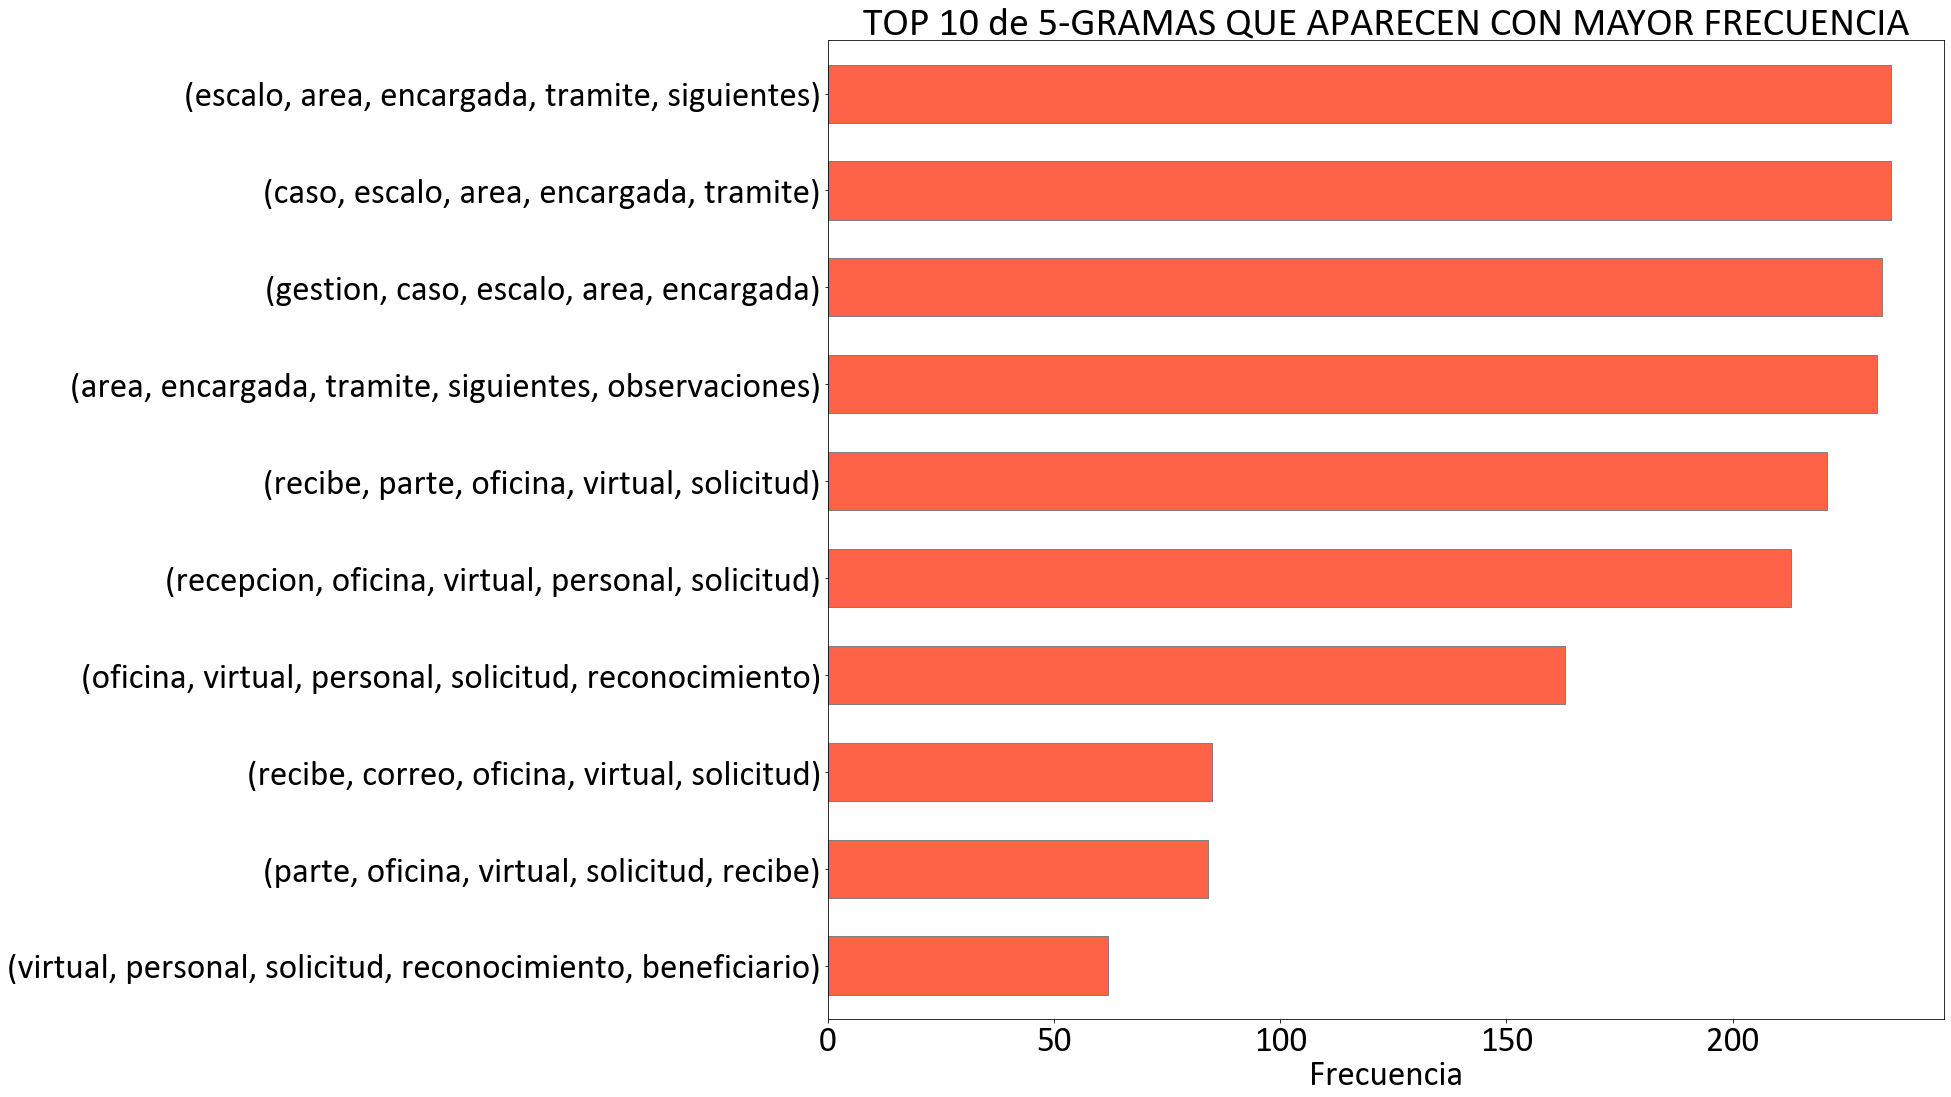

<Figure size 1080x720 with 0 Axes>

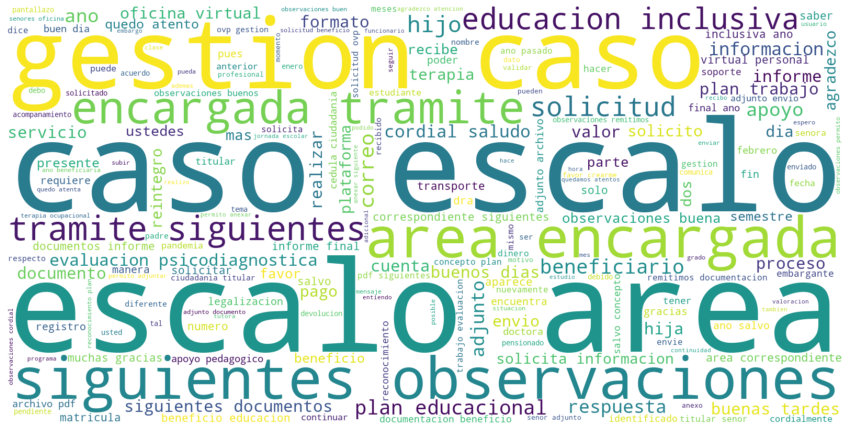

(caso, escalo)                 189
(escalo, area)                 189
(gestion, caso)                182
(siguientes, observaciones)    166
(area, encargada)              163
(encargada, tramite)           158
(tramite, siguientes)          158
(educacion, inclusiva)         136
(plan, educacional)             61
(cordial, saludo)               44
dtype: int64
(caso, escalo, area)                            189
(gestion, caso, escalo)                         182
(escalo, area, encargada)                       162
(encargada, tramite, siguientes)                158
(area, encargada, tramite)                      158
(tramite, siguientes, observaciones)            137
(correspondiente, siguientes, observaciones)     24
(escalo, area, correspondiente)                  24
(area, correspondiente, siguientes)              24
(beneficio, educacion, inclusiva)                23
dtype: int64
(gestion, caso, escalo, area)                         182
(caso, escalo, area, encargada)               

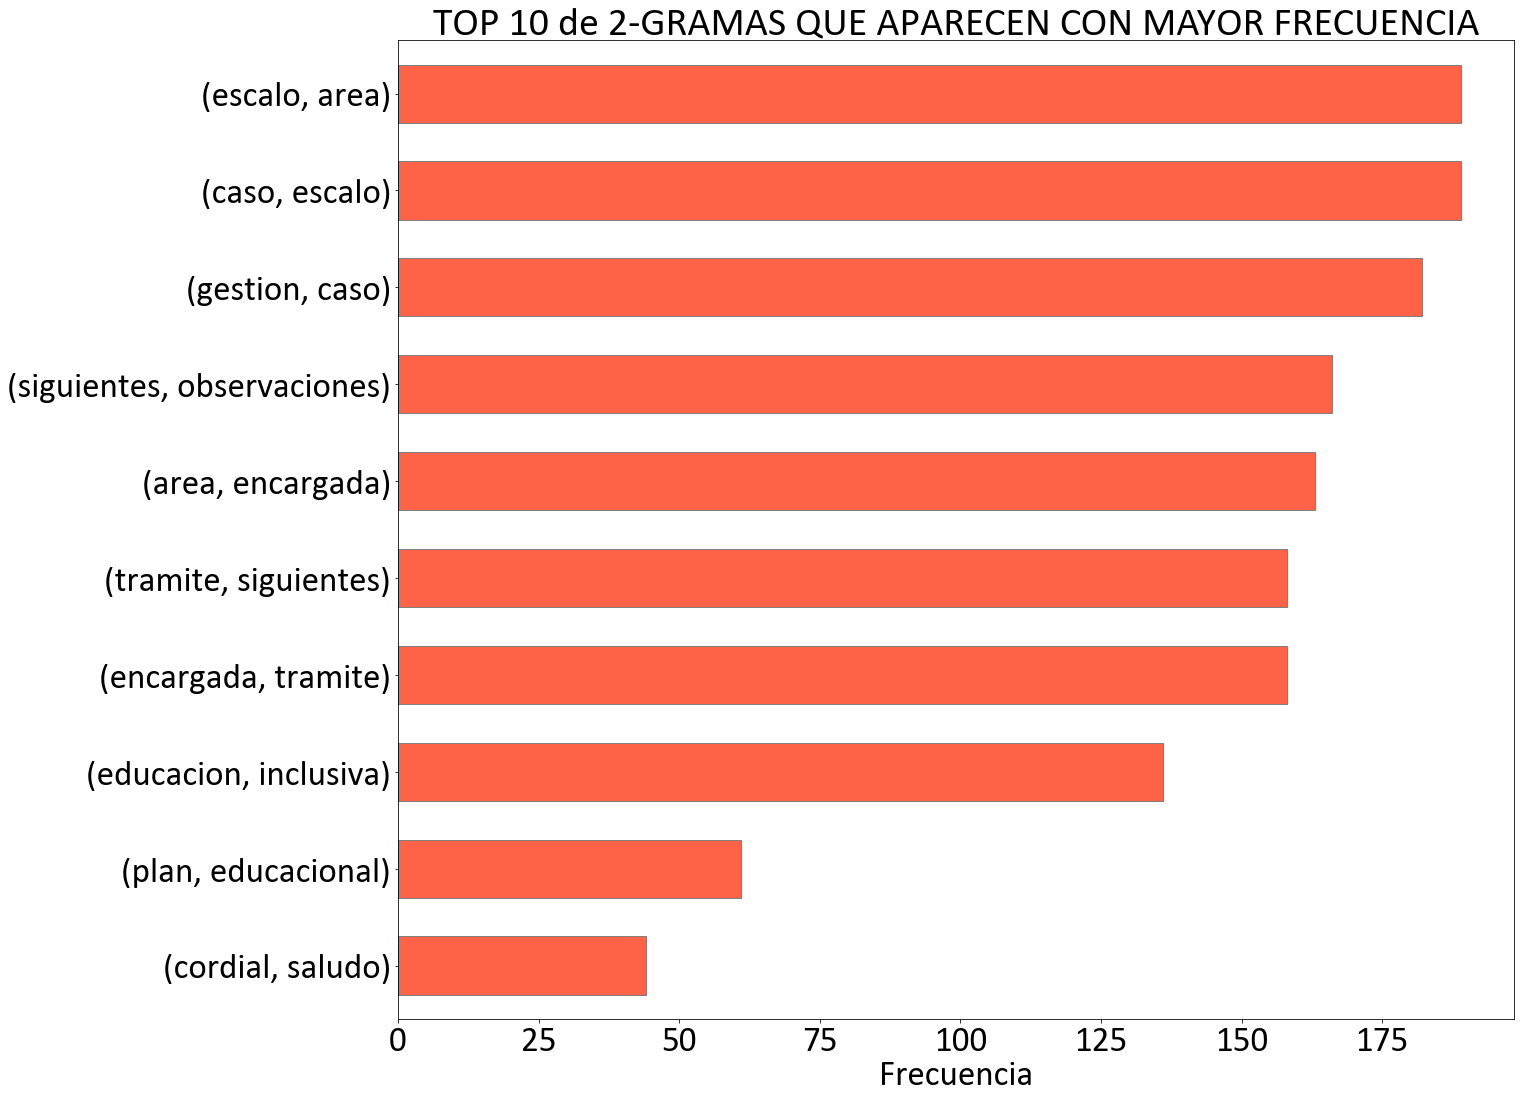

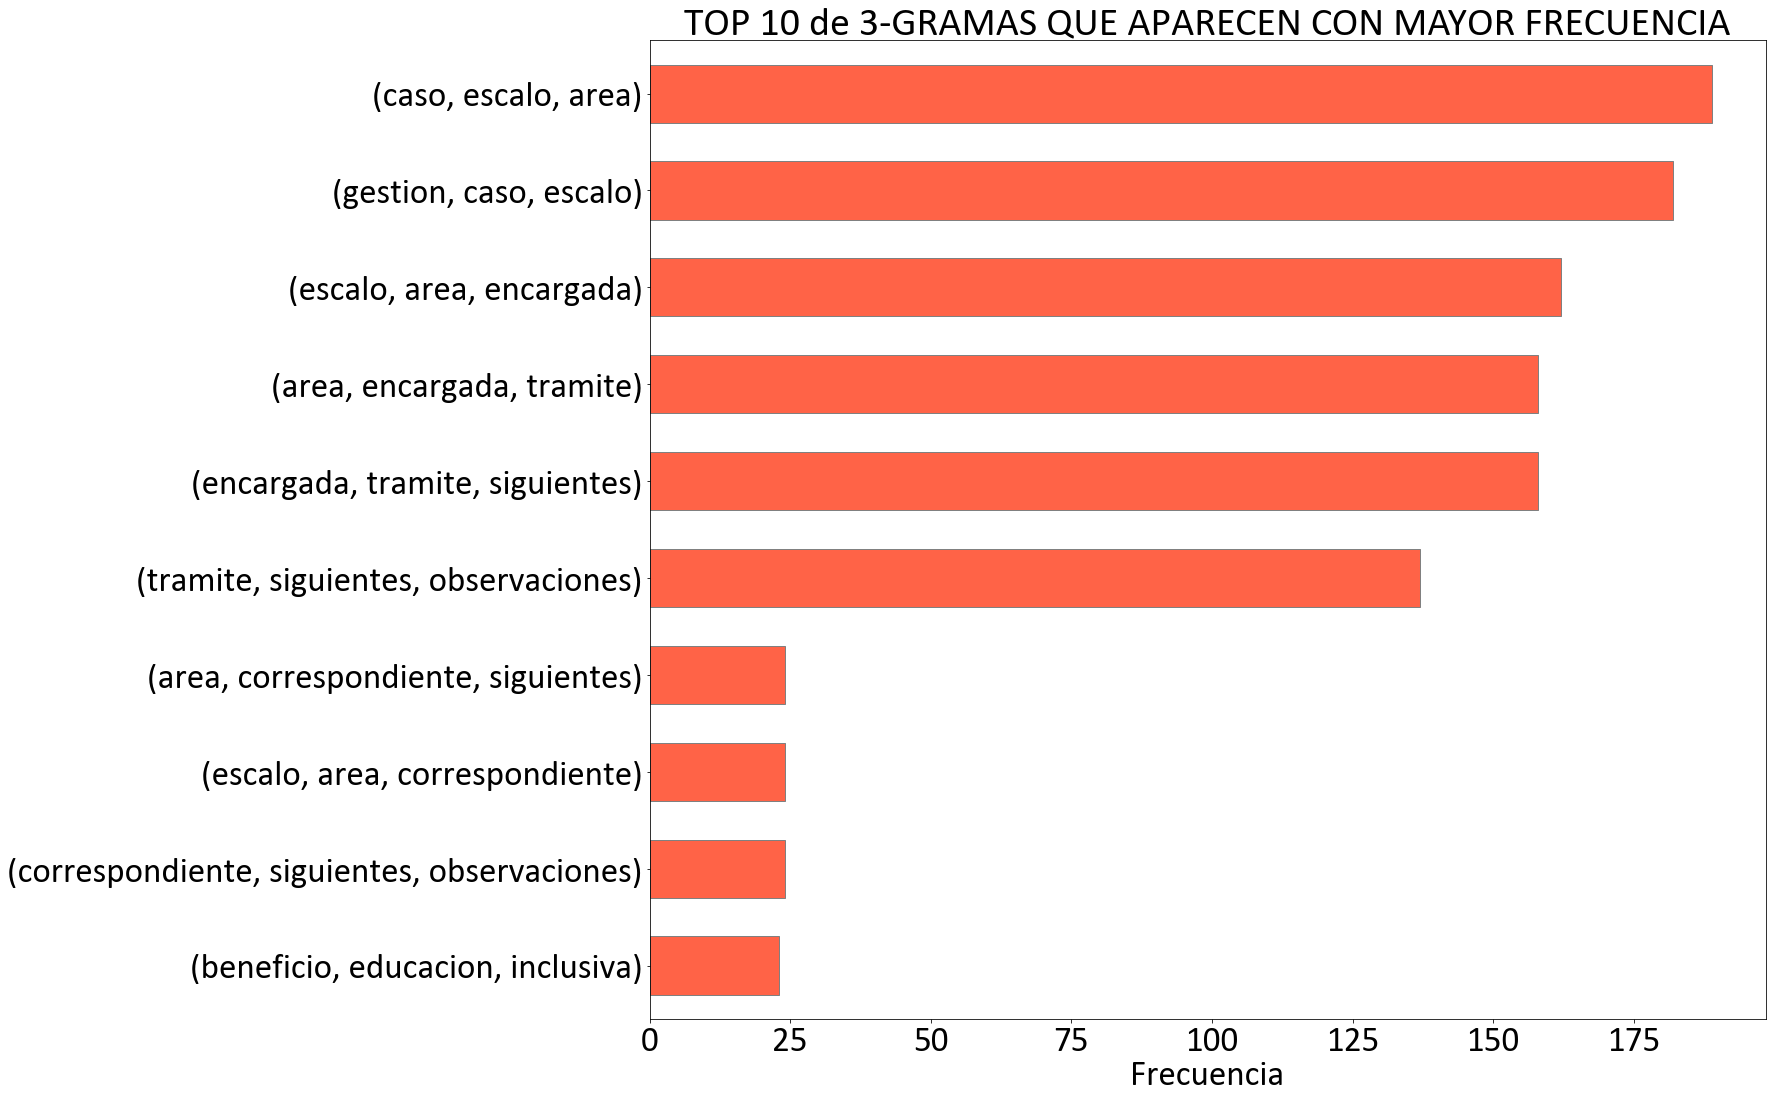

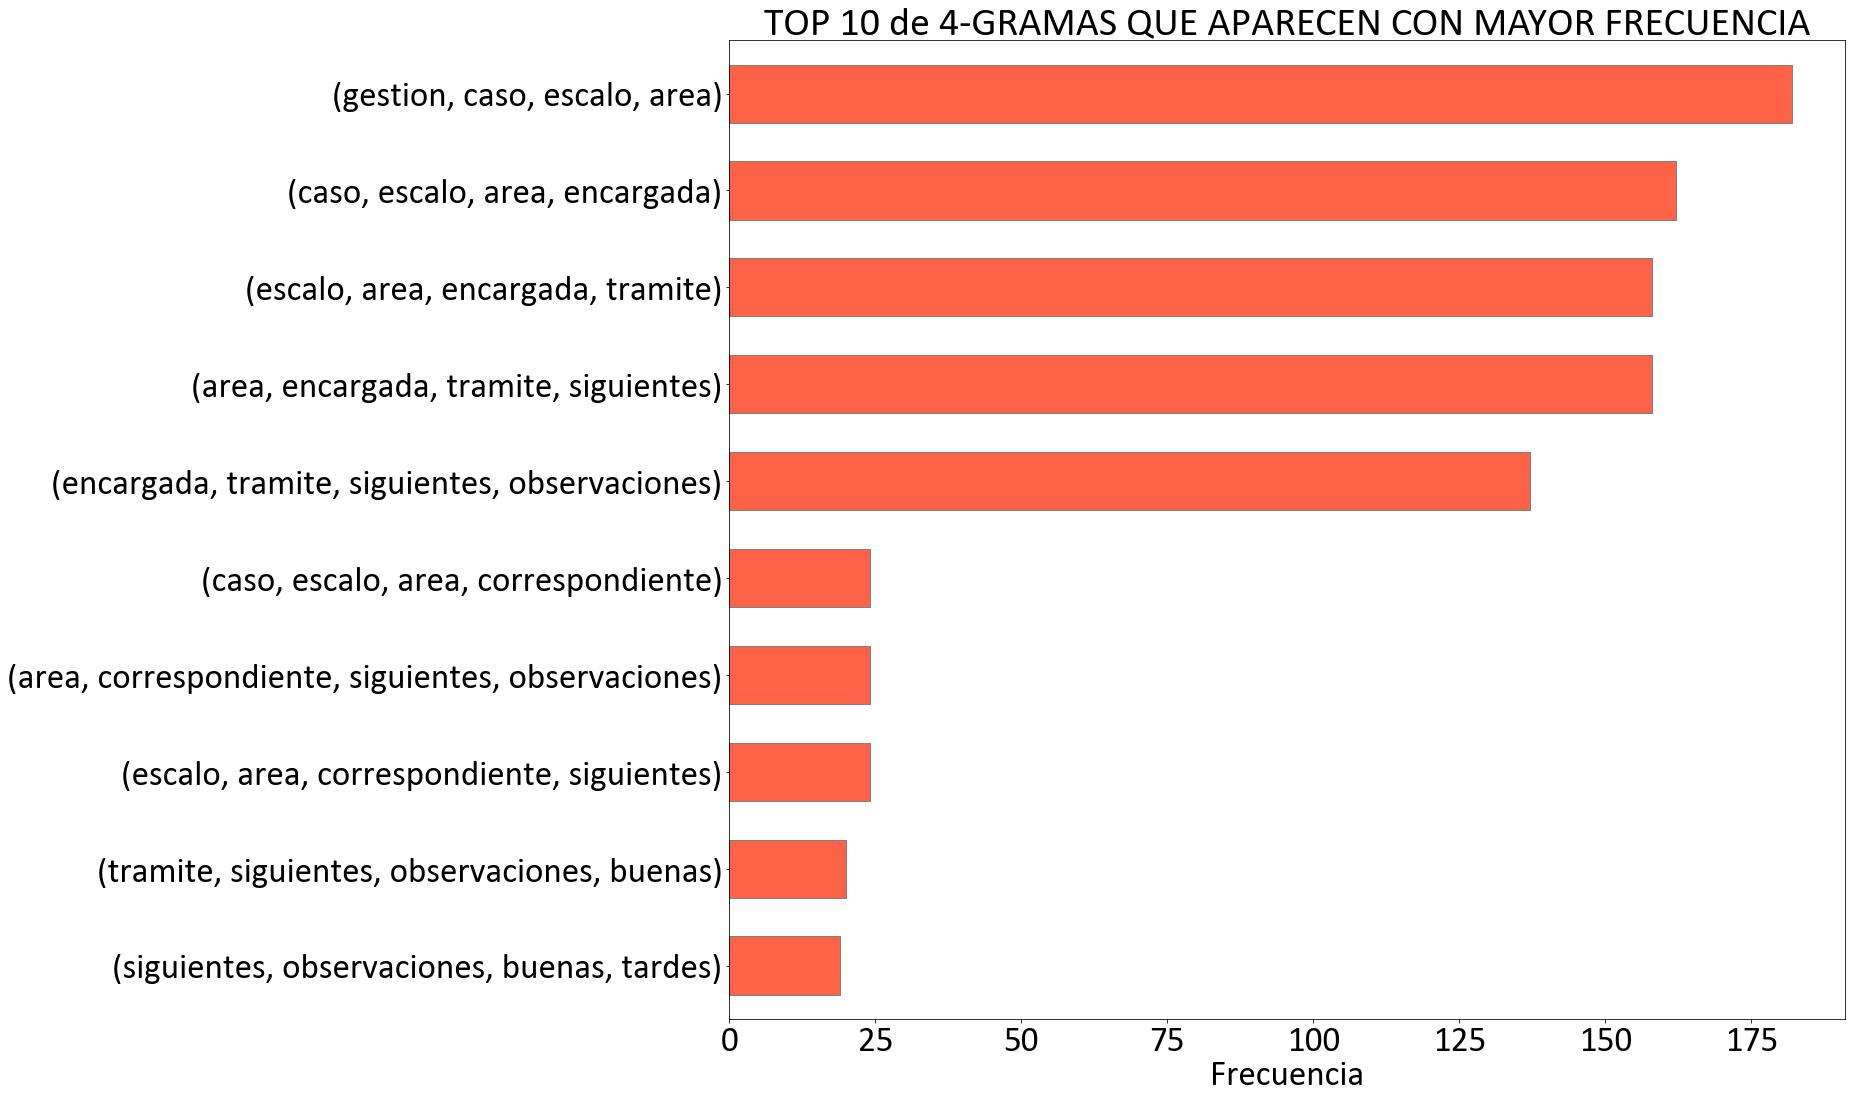

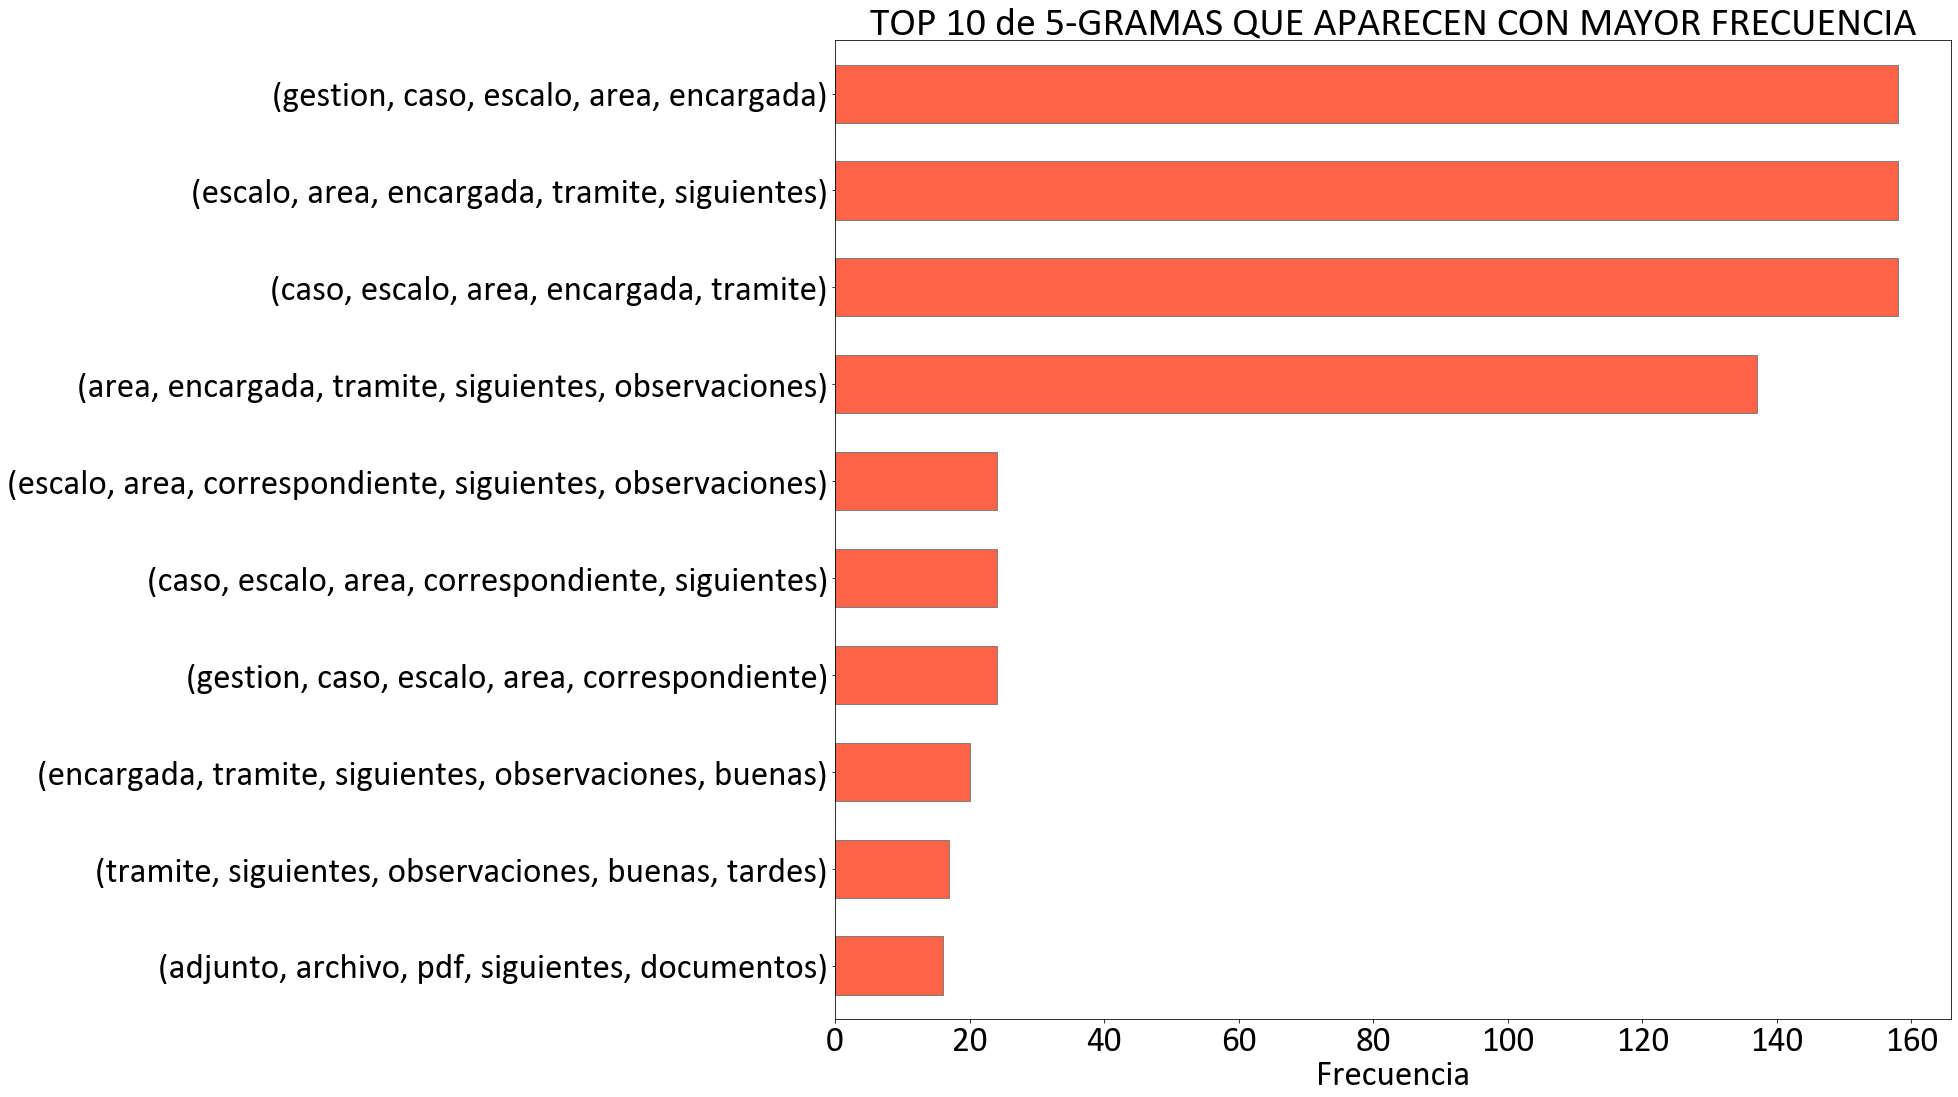

<Figure size 1080x720 with 0 Axes>

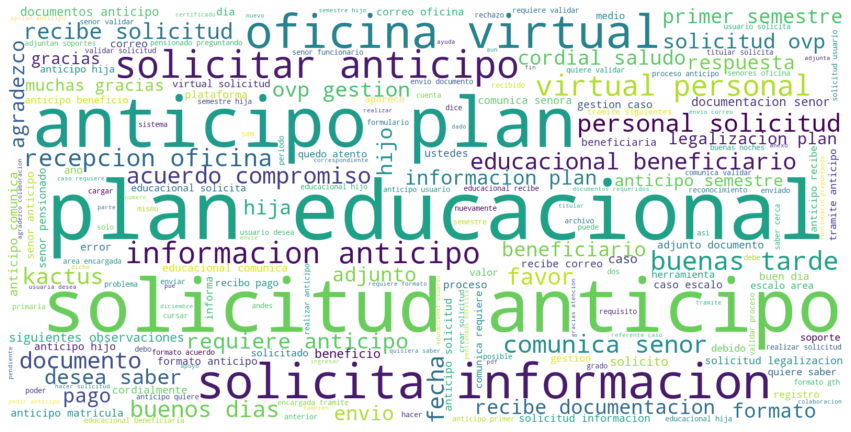

(plan, educacional)        1147
(solicitud, anticipo)       928
(anticipo, plan)            834
(solicita, informacion)     317
(oficina, virtual)          292
(solicitar, anticipo)       216
(informacion, anticipo)     214
(virtual, personal)         213
(personal, solicitud)       173
(buenas, tardes)            173
dtype: int64
(anticipo, plan, educacional)        819
(solicitud, anticipo, plan)          266
(oficina, virtual, personal)         213
(personal, solicitud, anticipo)      168
(recepcion, oficina, virtual)        162
(virtual, personal, solicitud)       162
(plan, educacional, beneficiario)    148
(recibe, solicitud, anticipo)        119
(solicitud, ovp, gestion)            113
(requiere, anticipo, plan)           105
dtype: int64
(solicitud, anticipo, plan, educacional)        265
(oficina, virtual, personal, solicitud)         162
(recepcion, oficina, virtual, personal)         162
(virtual, personal, solicitud, anticipo)        158
(personal, solicitud, anticipo, plan

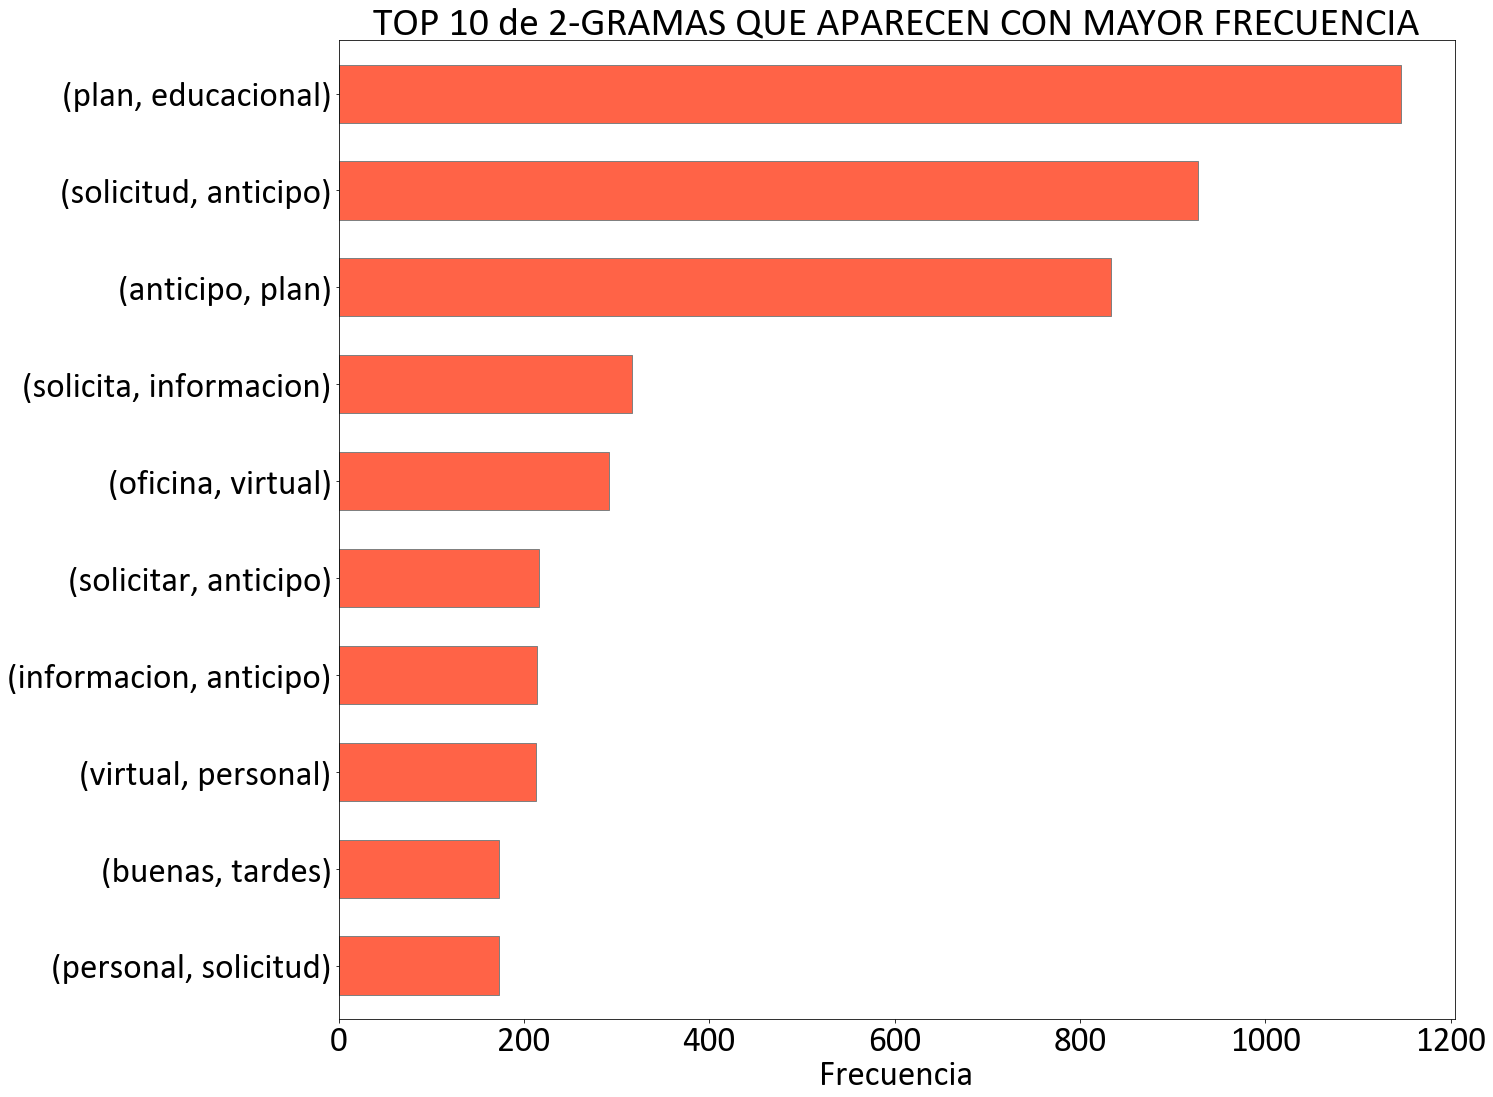

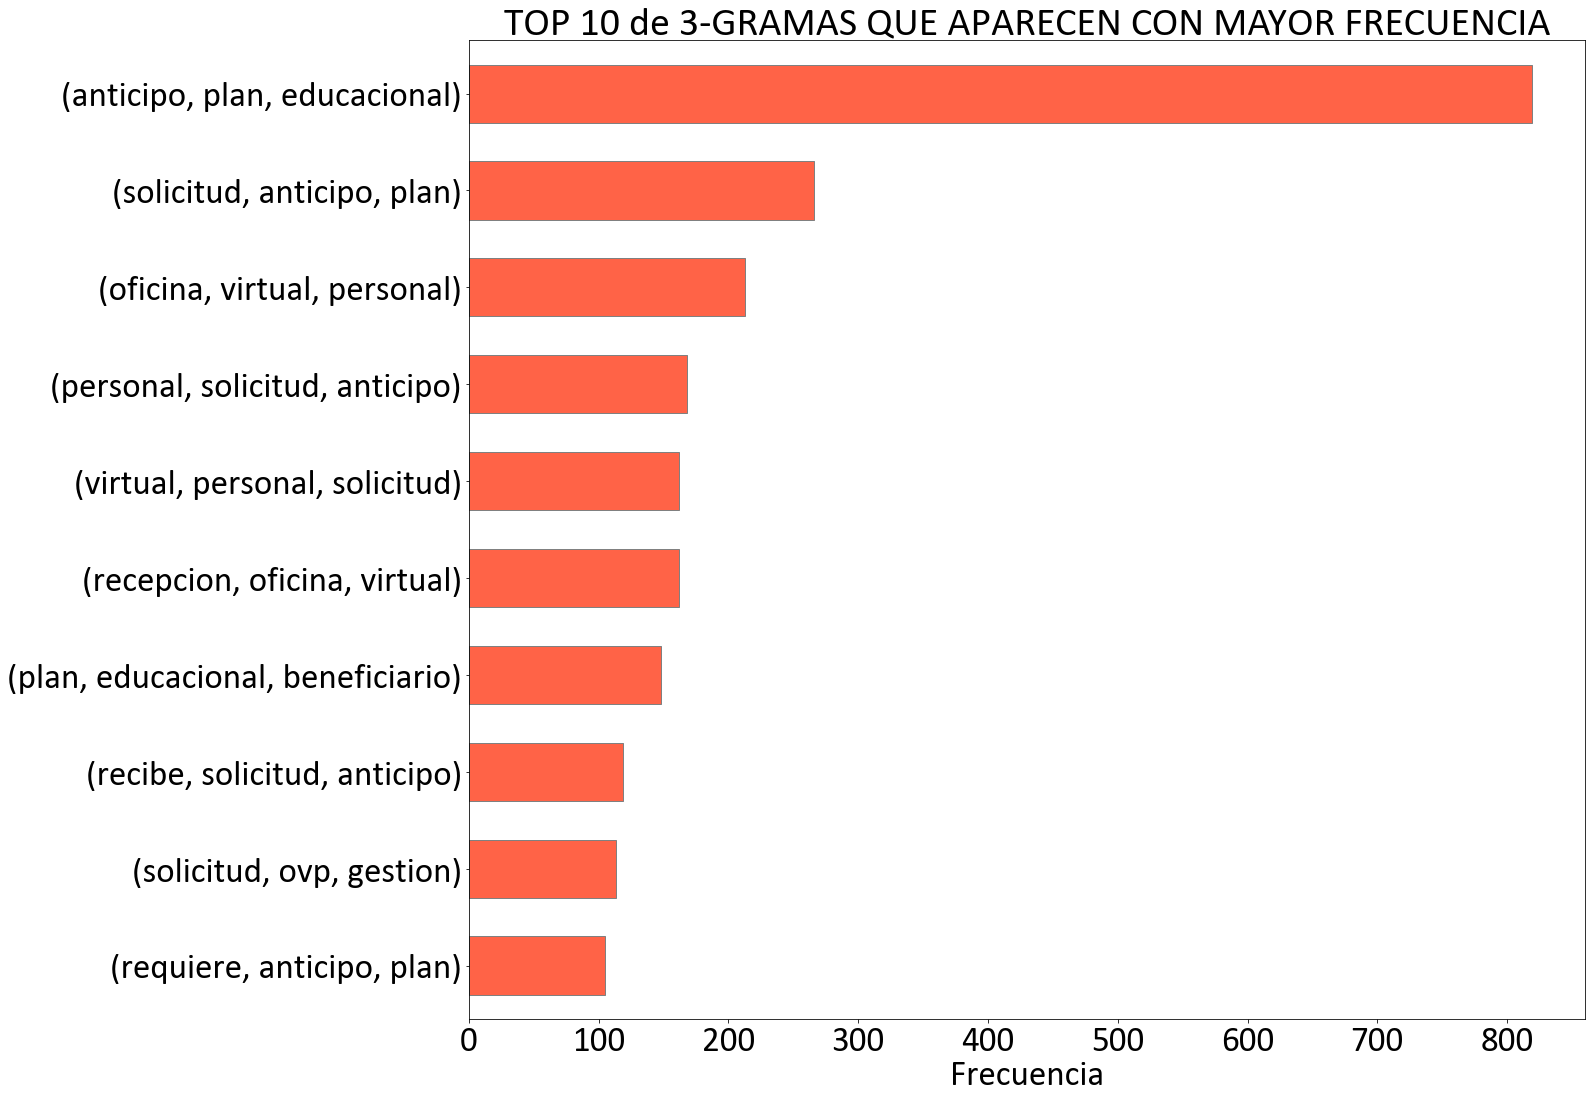

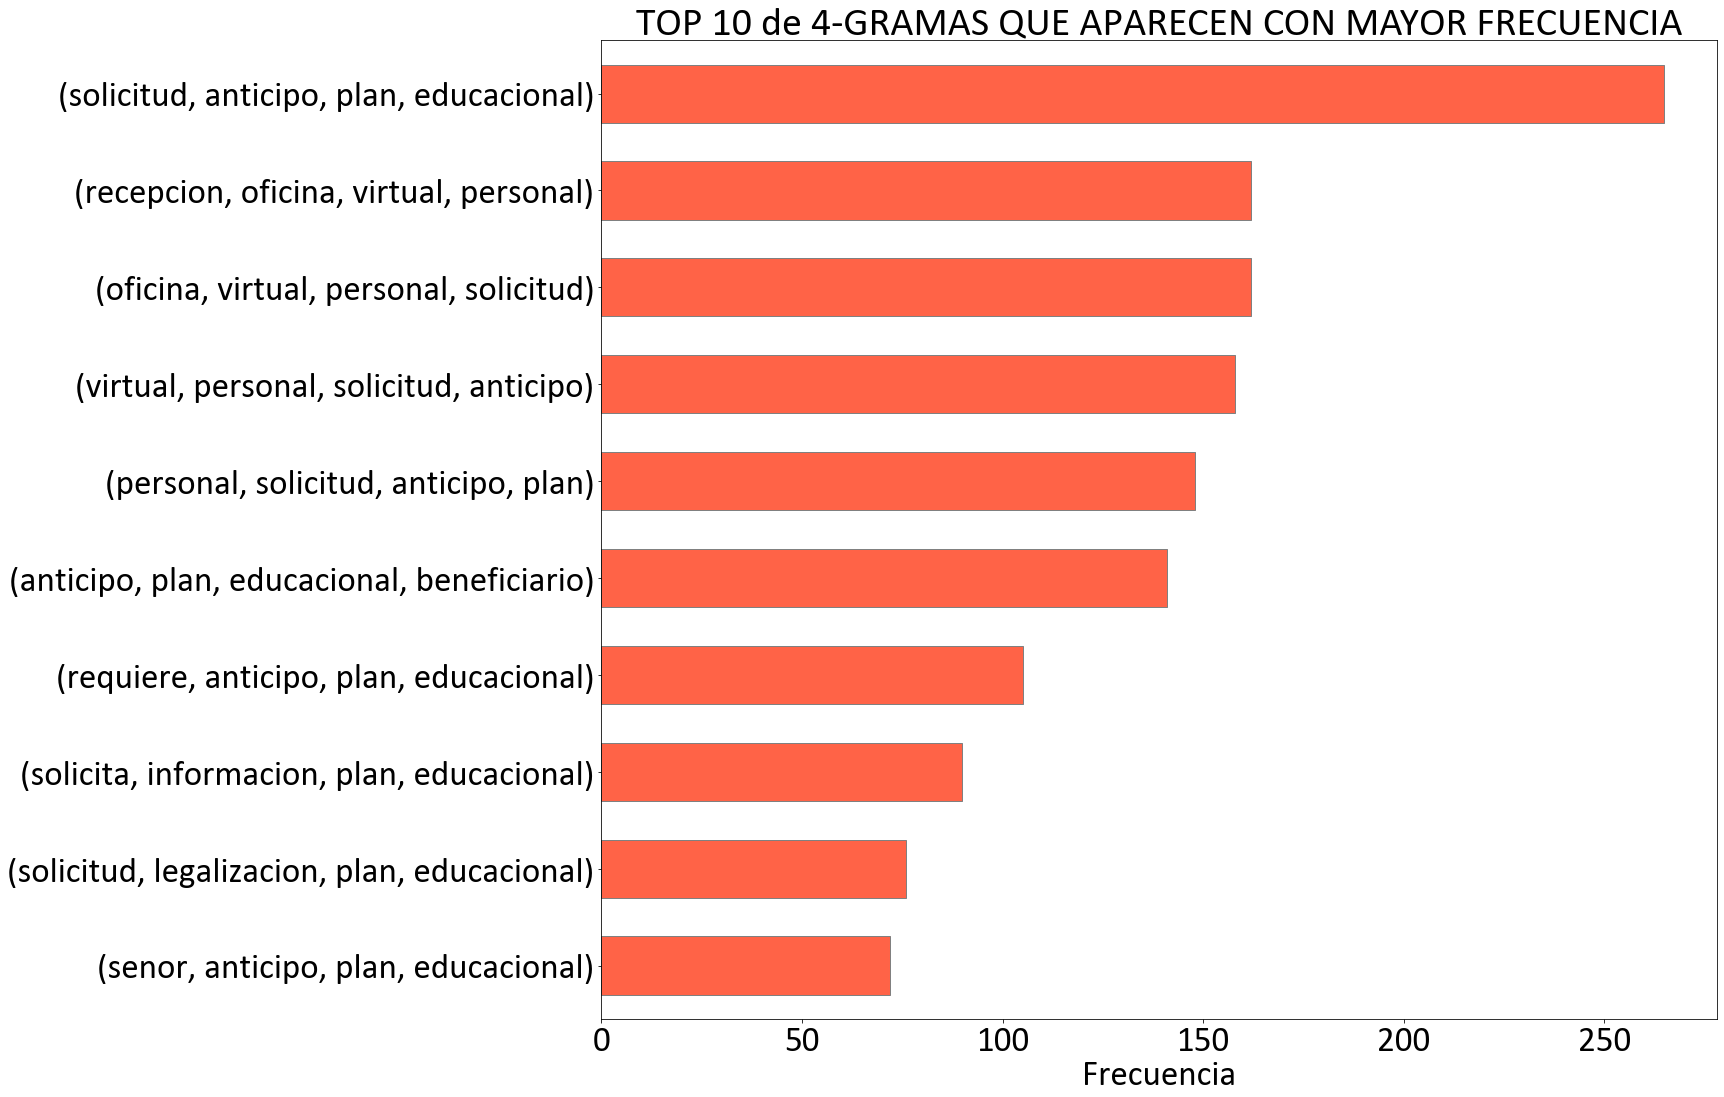

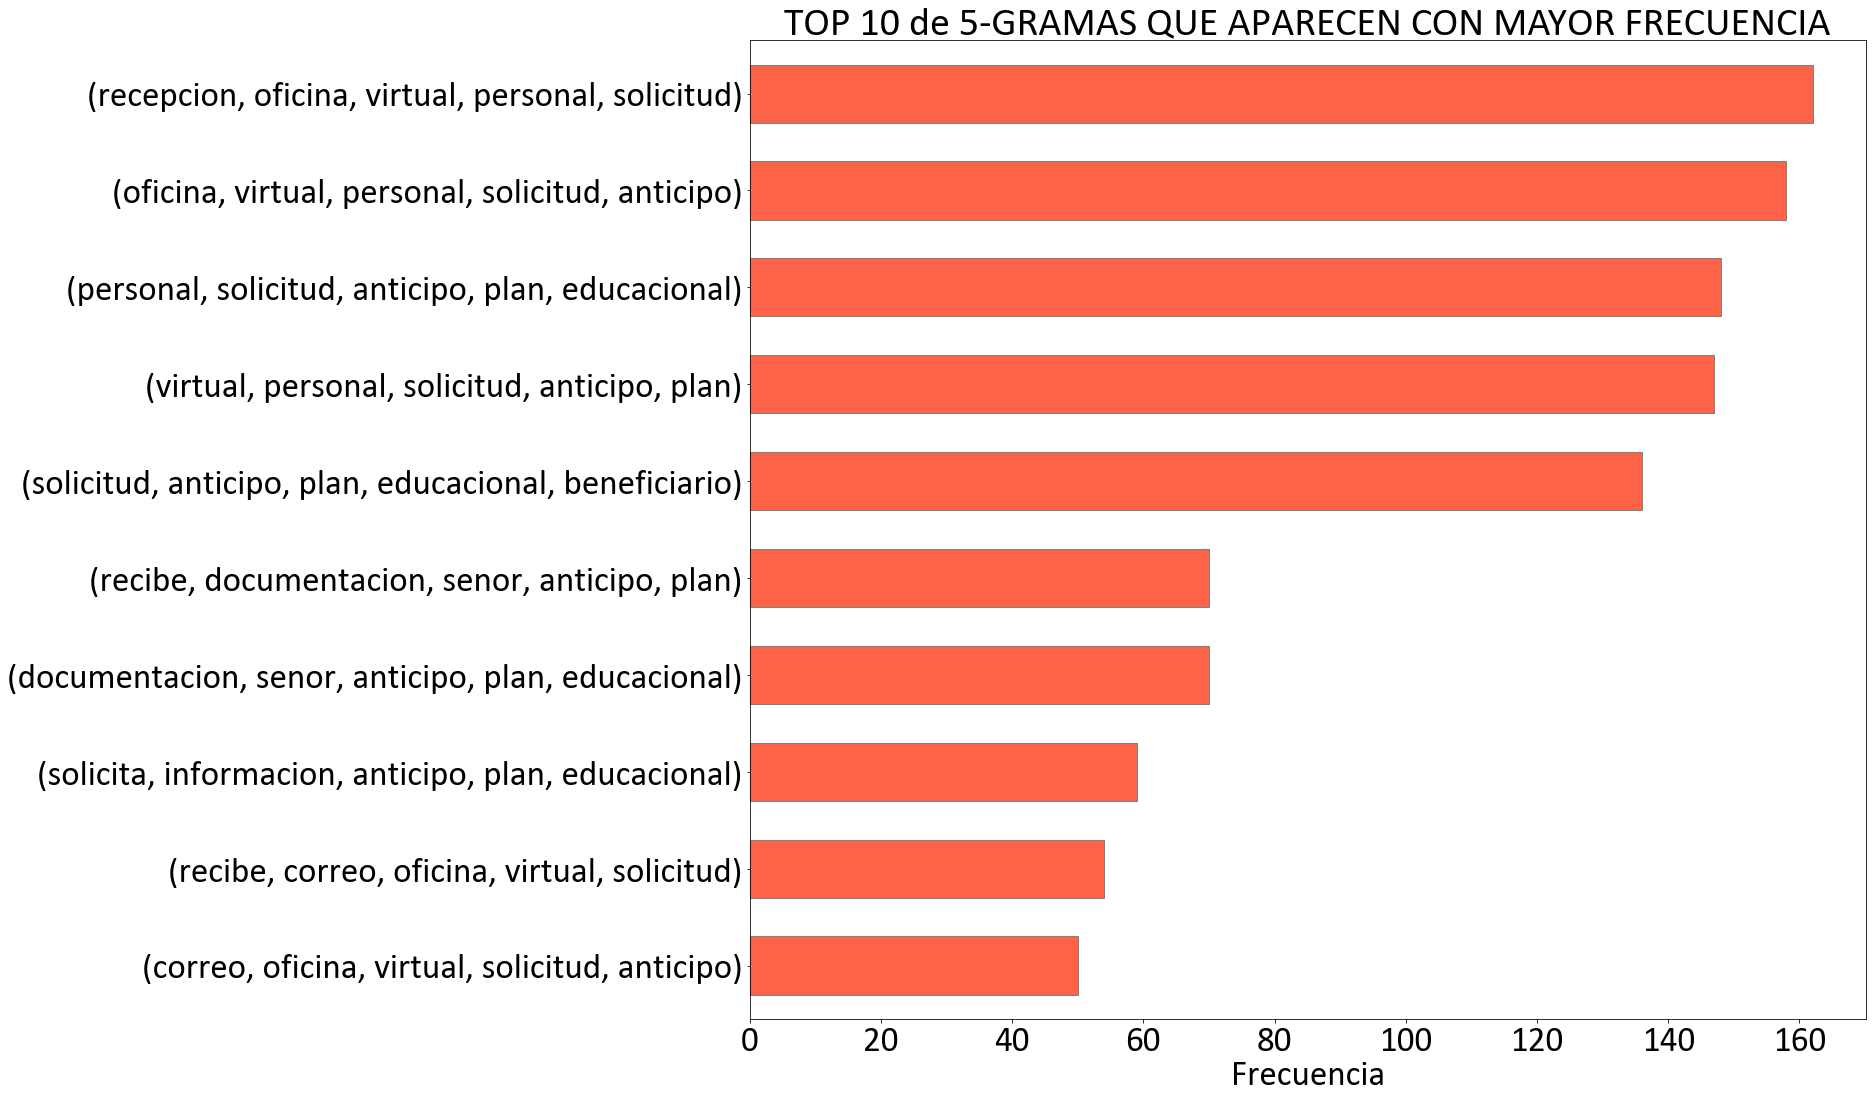

<Figure size 1080x720 with 0 Axes>

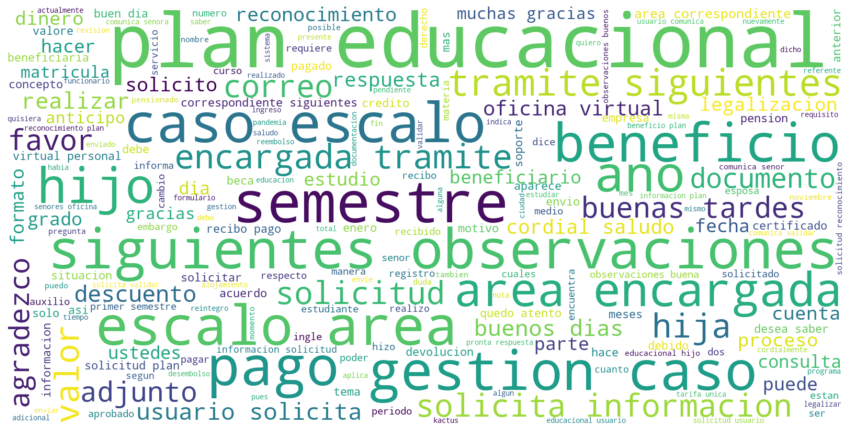

(plan, educacional)            482
(caso, escalo)                 235
(escalo, area)                 233
(siguientes, observaciones)    230
(gestion, caso)                224
(area, encargada)              168
(tramite, siguientes)          163
(encargada, tramite)           161
(solicita, informacion)        143
(buenas, tardes)               120
dtype: int64
(caso, escalo, area)                            233
(gestion, caso, escalo)                         213
(escalo, area, encargada)                       166
(area, encargada, tramite)                      161
(encargada, tramite, siguientes)                161
(tramite, siguientes, observaciones)            152
(usuario, solicita, informacion)                 71
(area, correspondiente, siguientes)              61
(escalo, area, correspondiente)                  61
(correspondiente, siguientes, observaciones)     61
dtype: int64
(gestion, caso, escalo, area)                         213
(caso, escalo, area, encargada)               

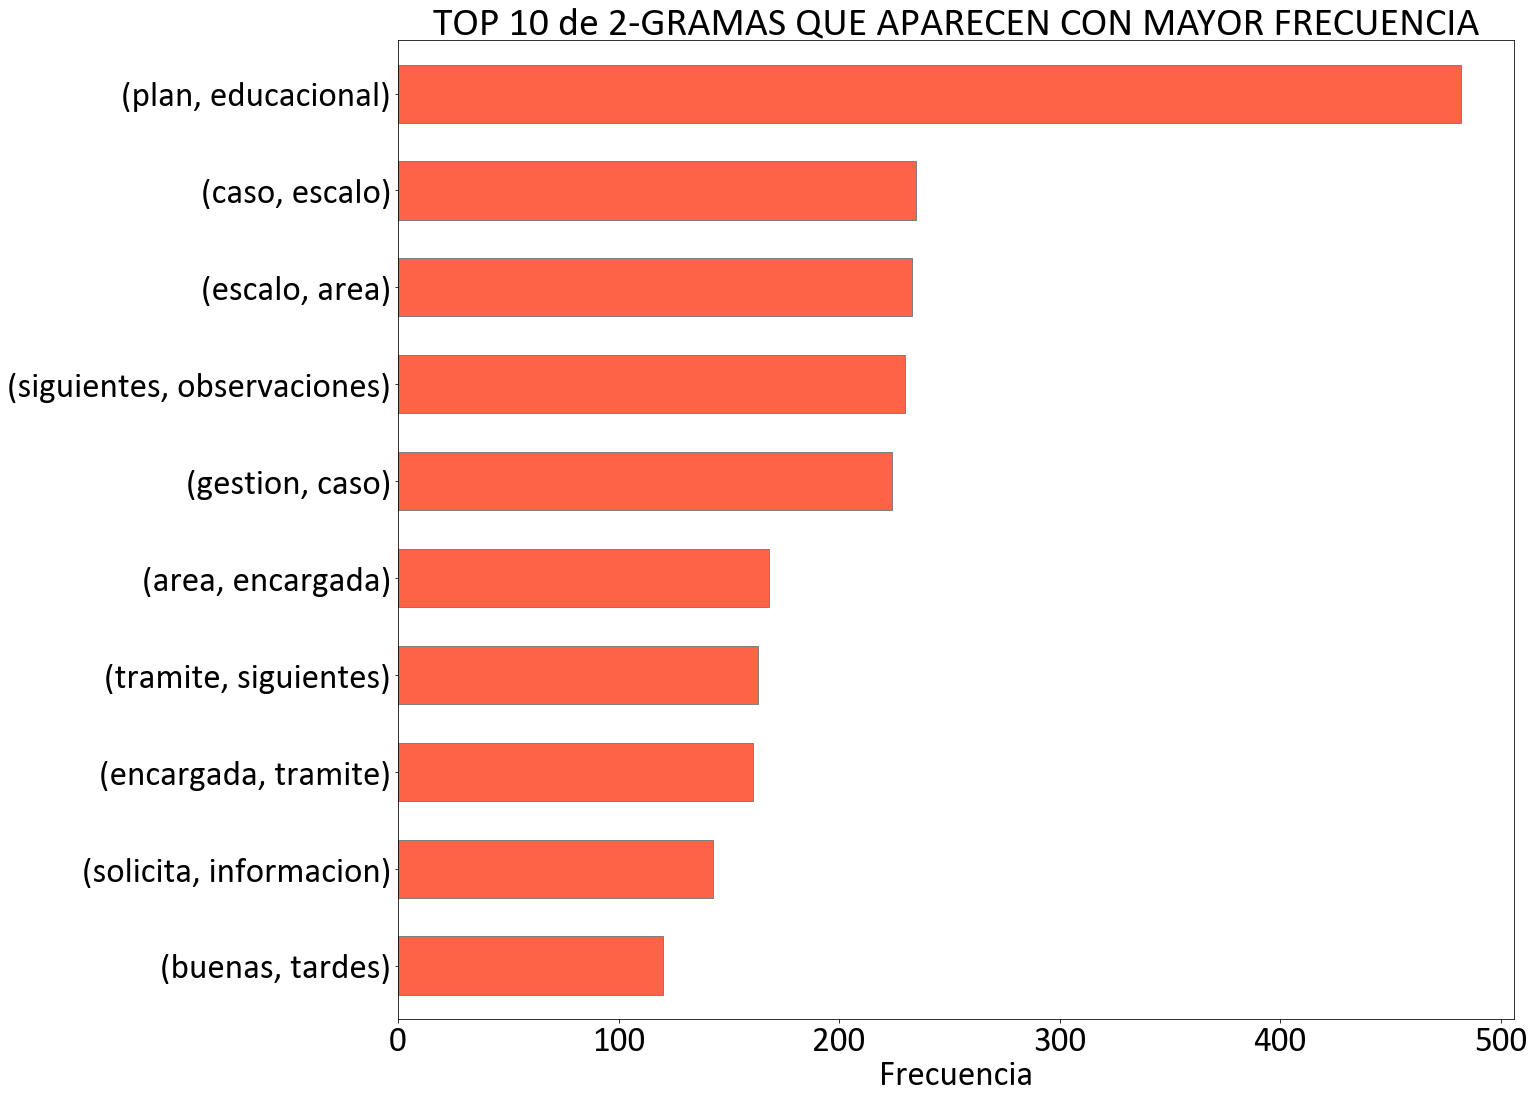

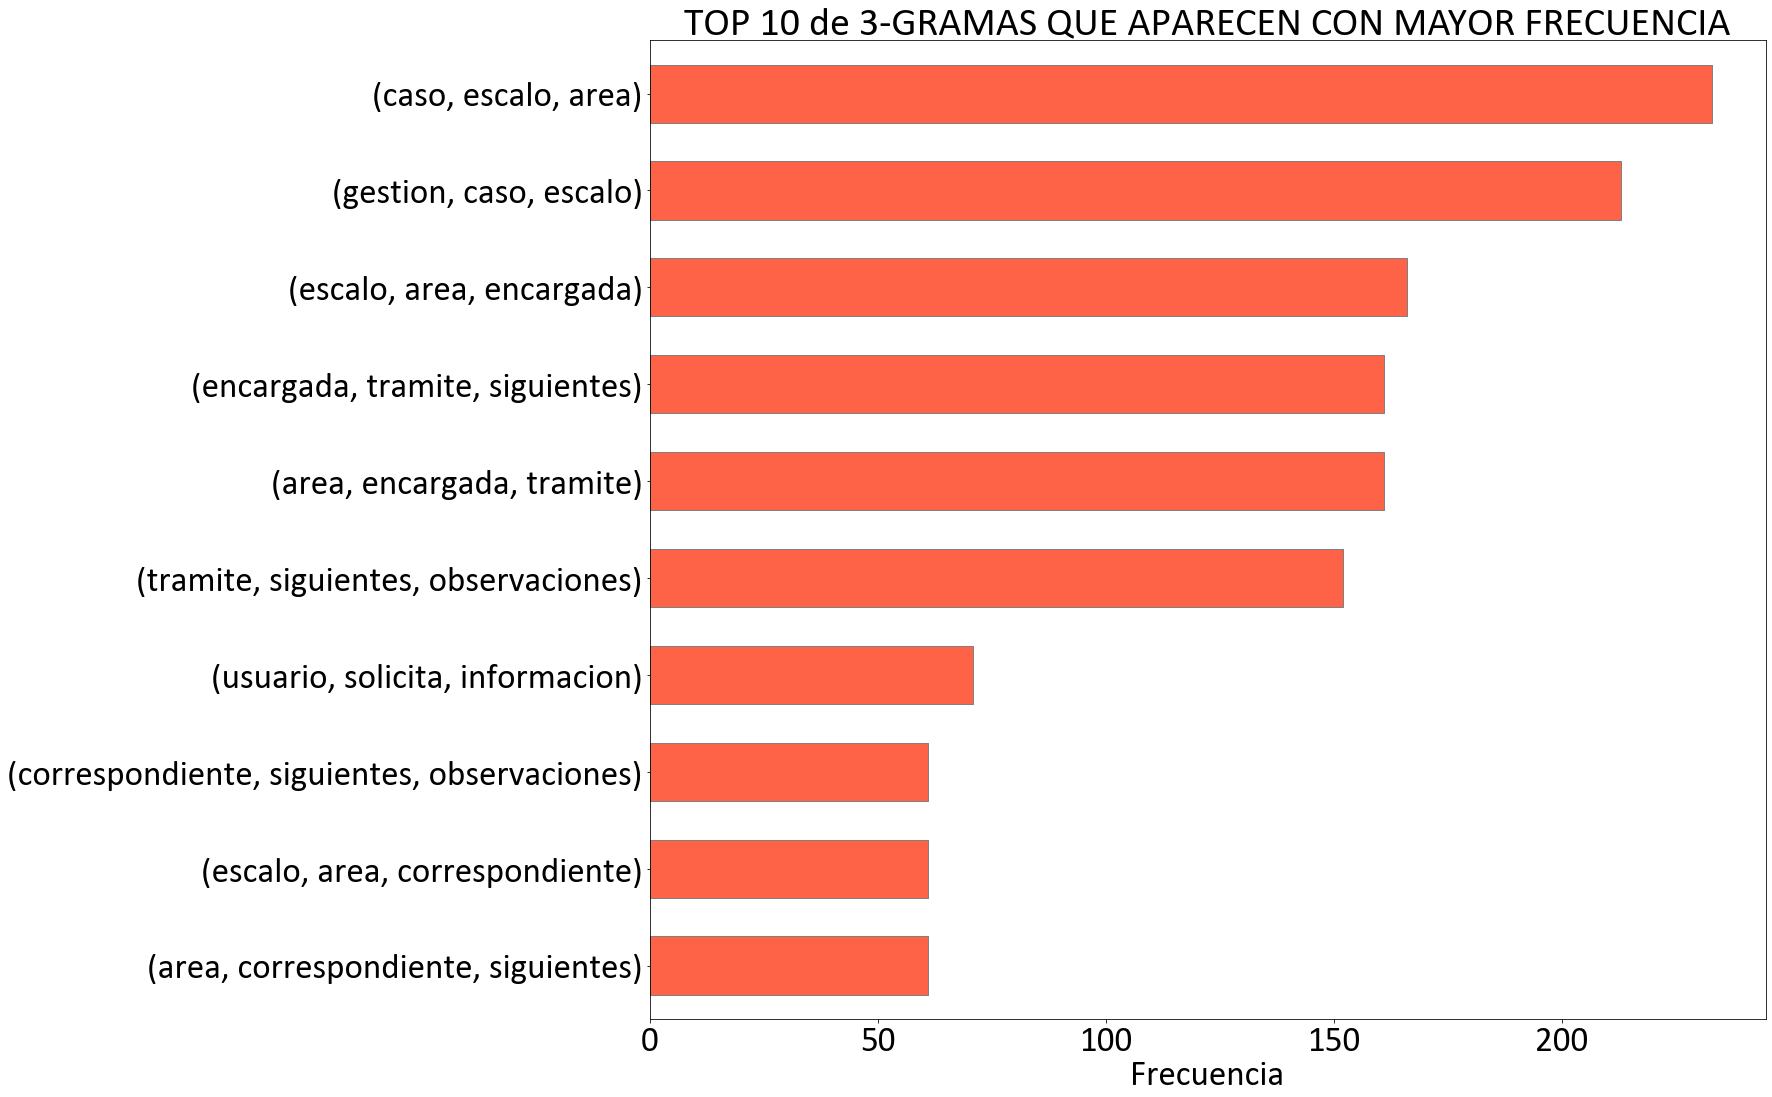

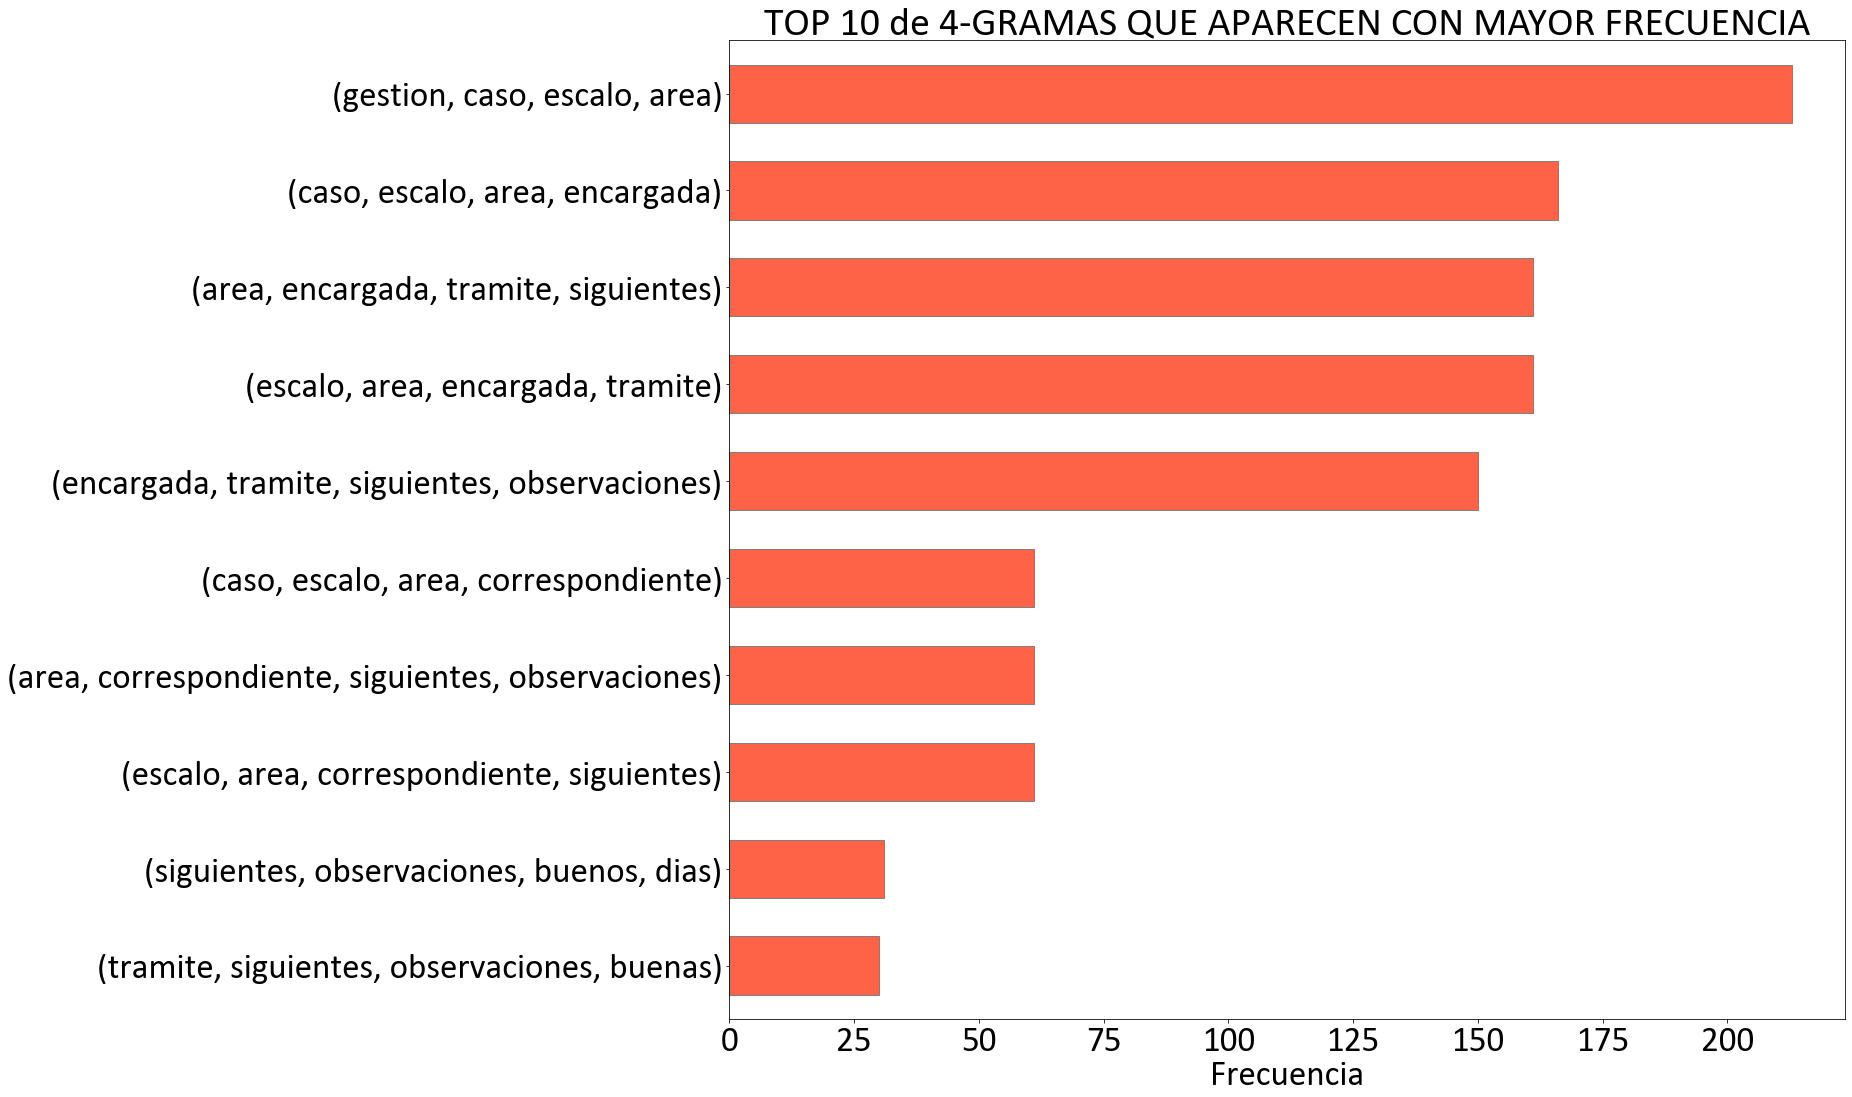

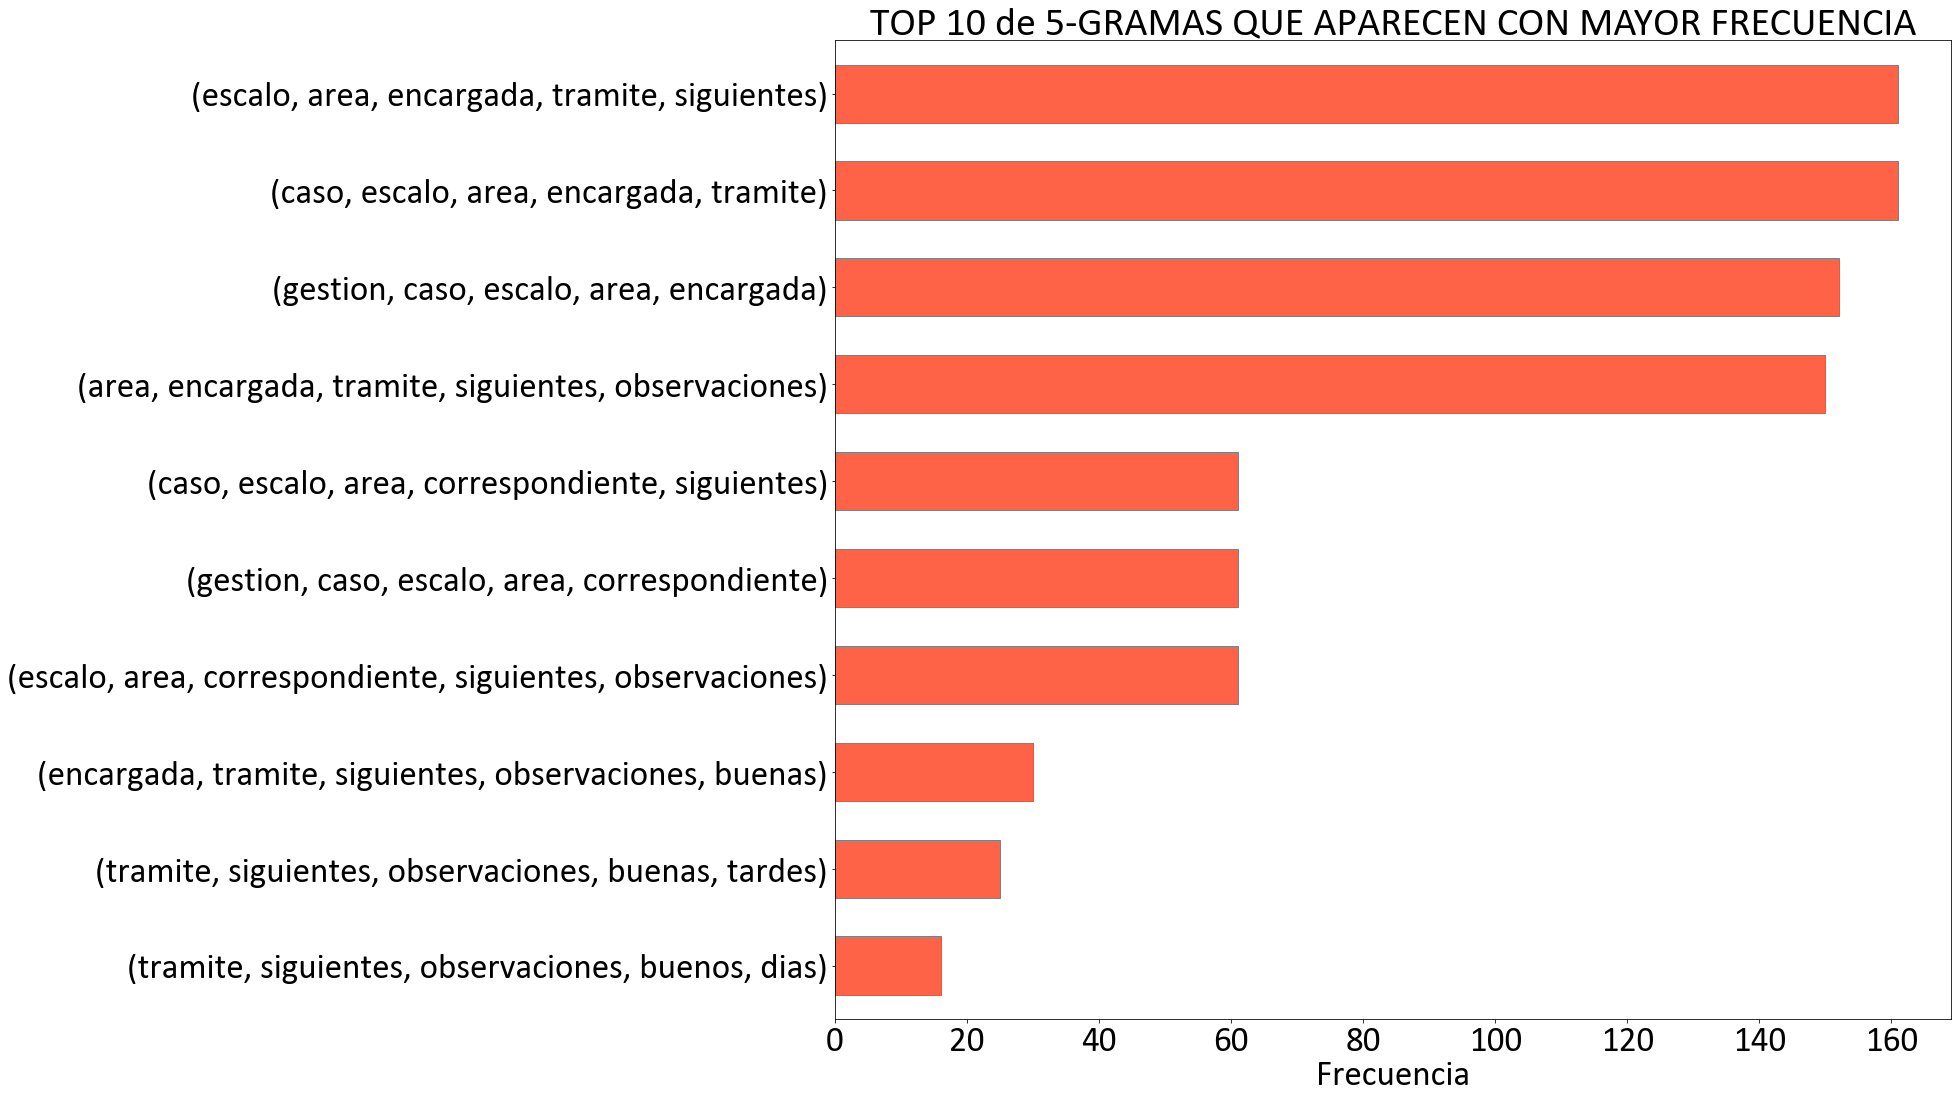

<Figure size 1080x720 with 0 Axes>

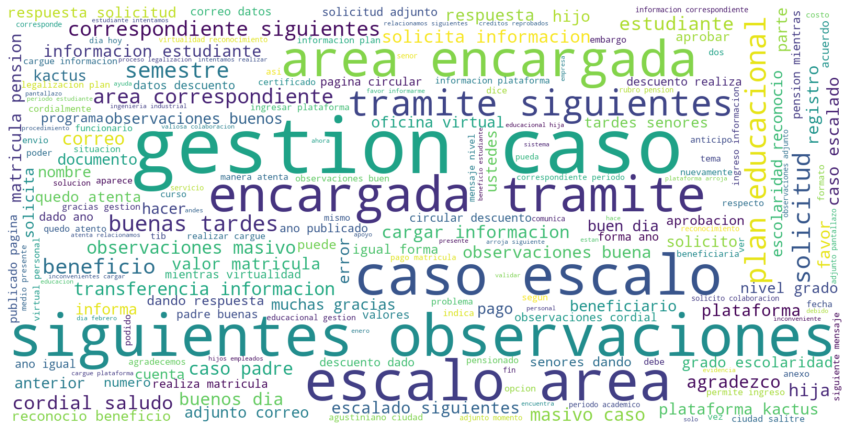

(gestion, caso)                609
(siguientes, observaciones)    582
(caso, escalo)                 552
(escalo, area)                 550
(area, encargada)              426
(tramite, siguientes)          420
(encargada, tramite)           420
(plan, educacional)            251
(buenas, tardes)               145
(area, correspondiente)        123
dtype: int64
(caso, escalo, area)                            550
(gestion, caso, escalo)                         537
(escalo, area, encargada)                       424
(area, encargada, tramite)                      420
(encargada, tramite, siguientes)                420
(tramite, siguientes, observaciones)            381
(correspondiente, siguientes, observaciones)    123
(area, correspondiente, siguientes)             123
(escalo, area, correspondiente)                 121
(masivo, caso, padre)                            88
dtype: int64
(gestion, caso, escalo, area)                         537
(caso, escalo, area, encargada)               

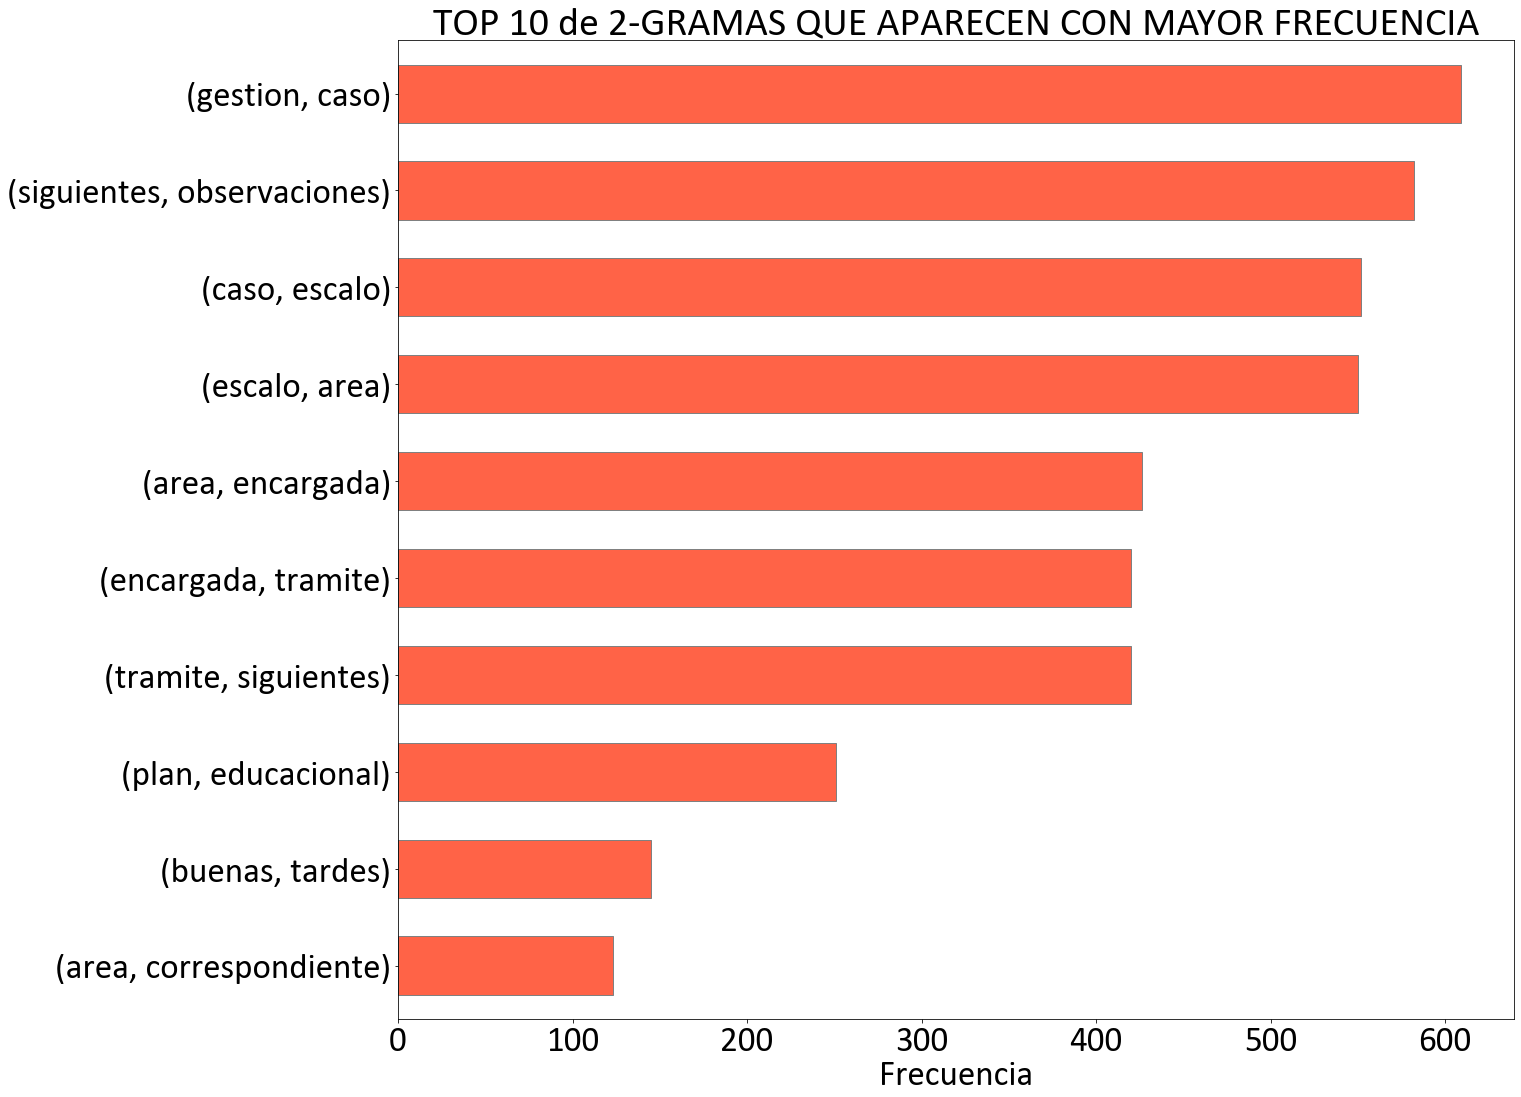

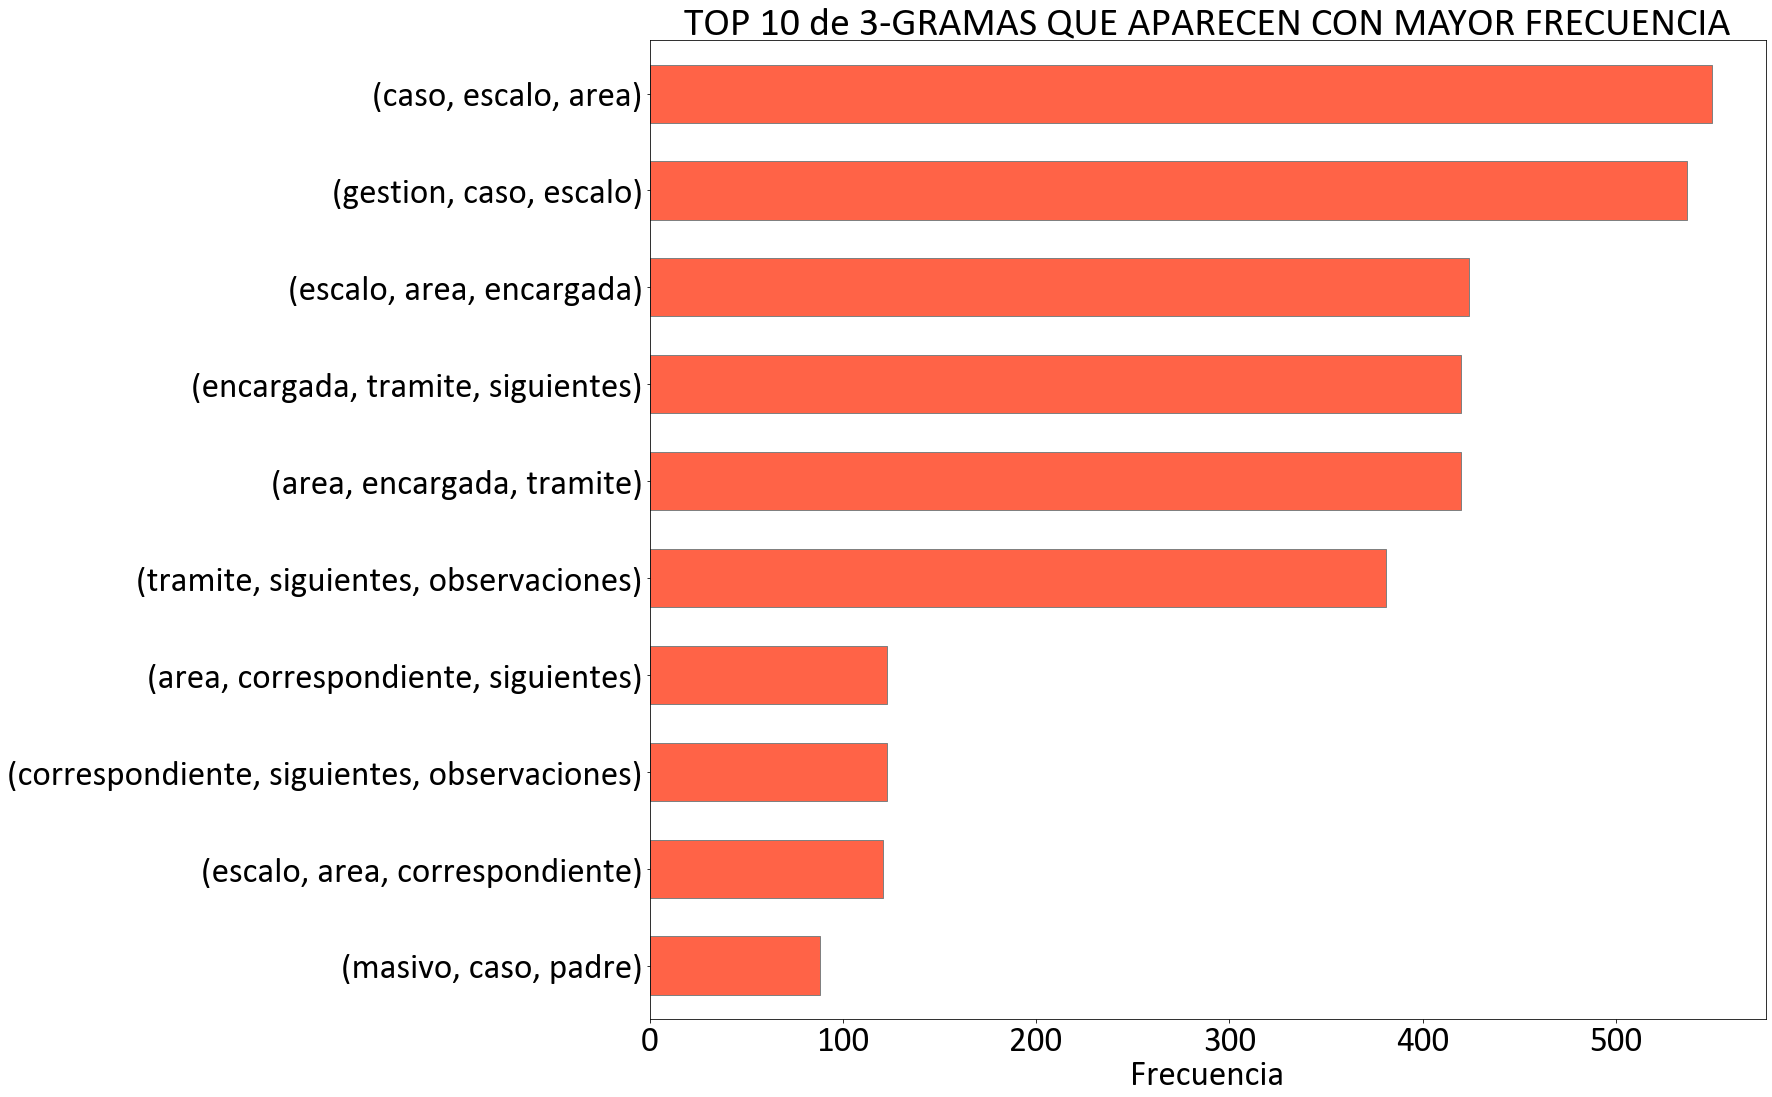

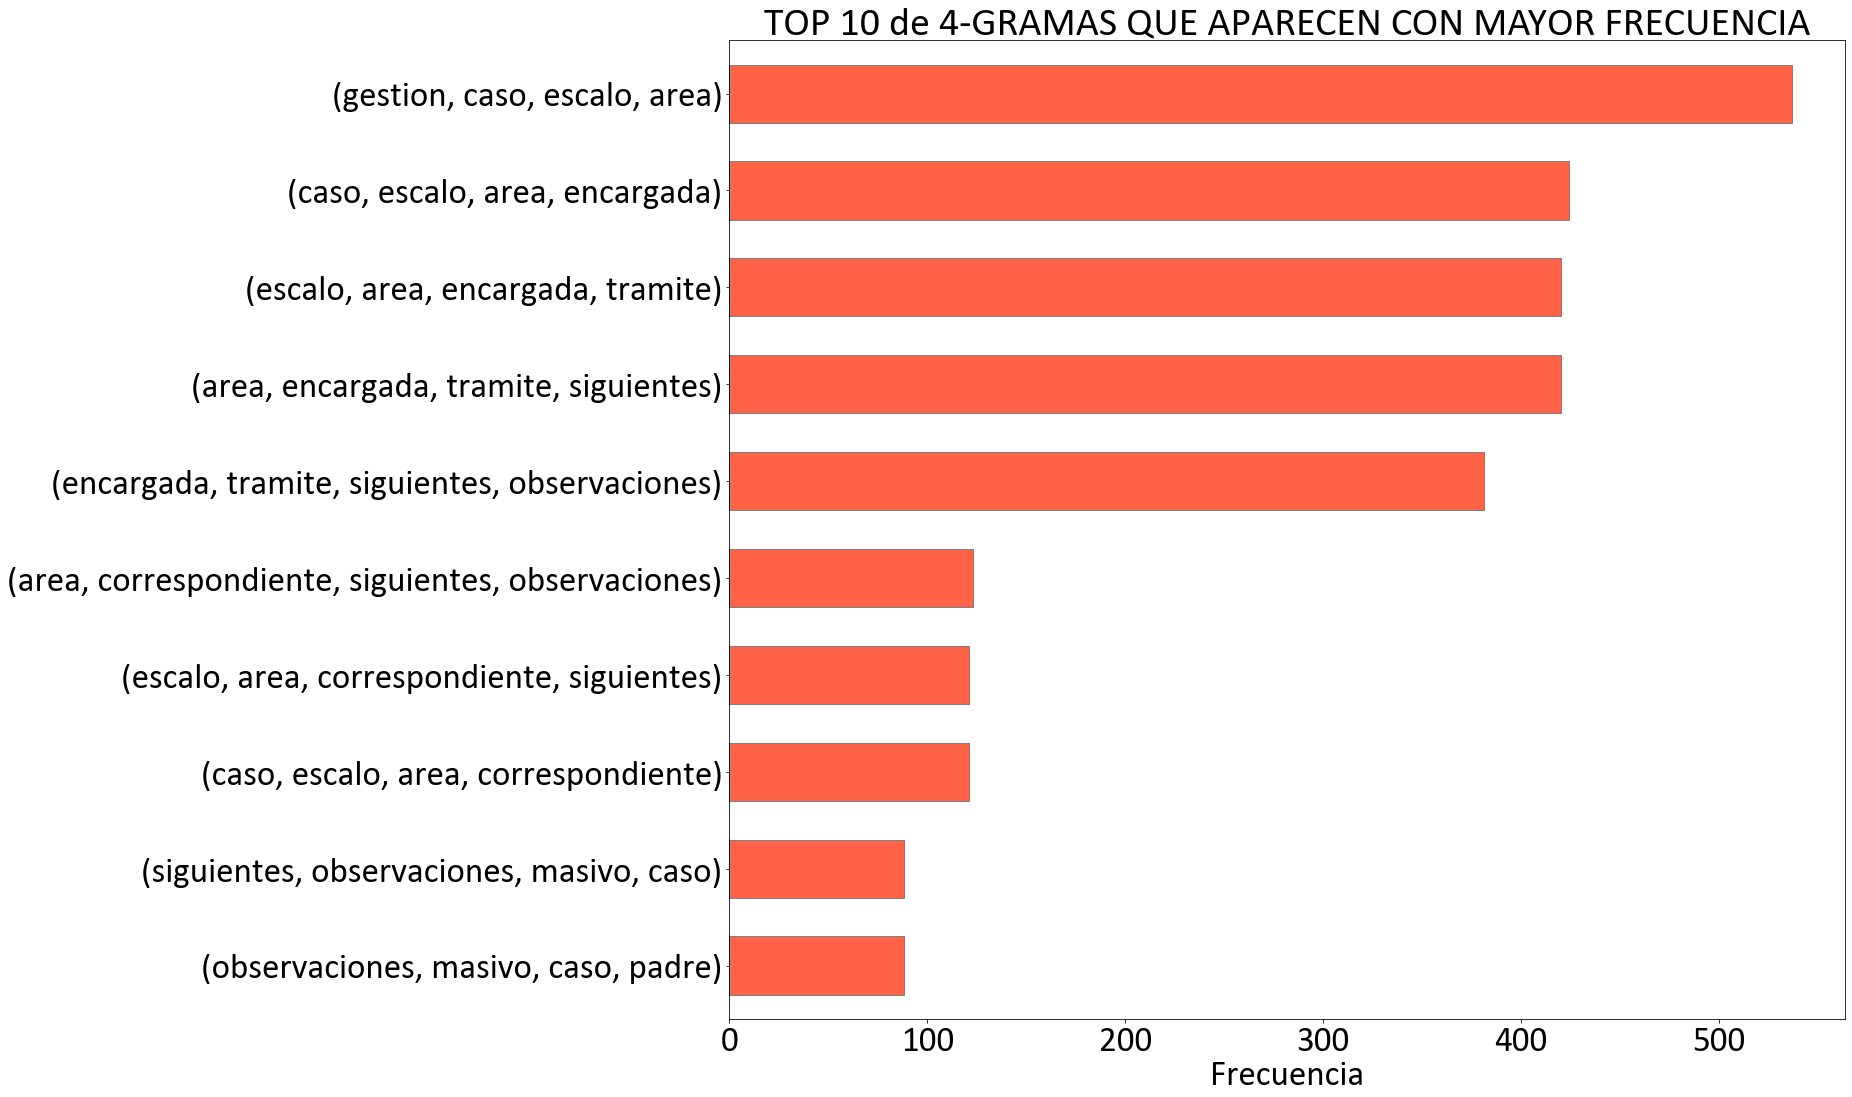

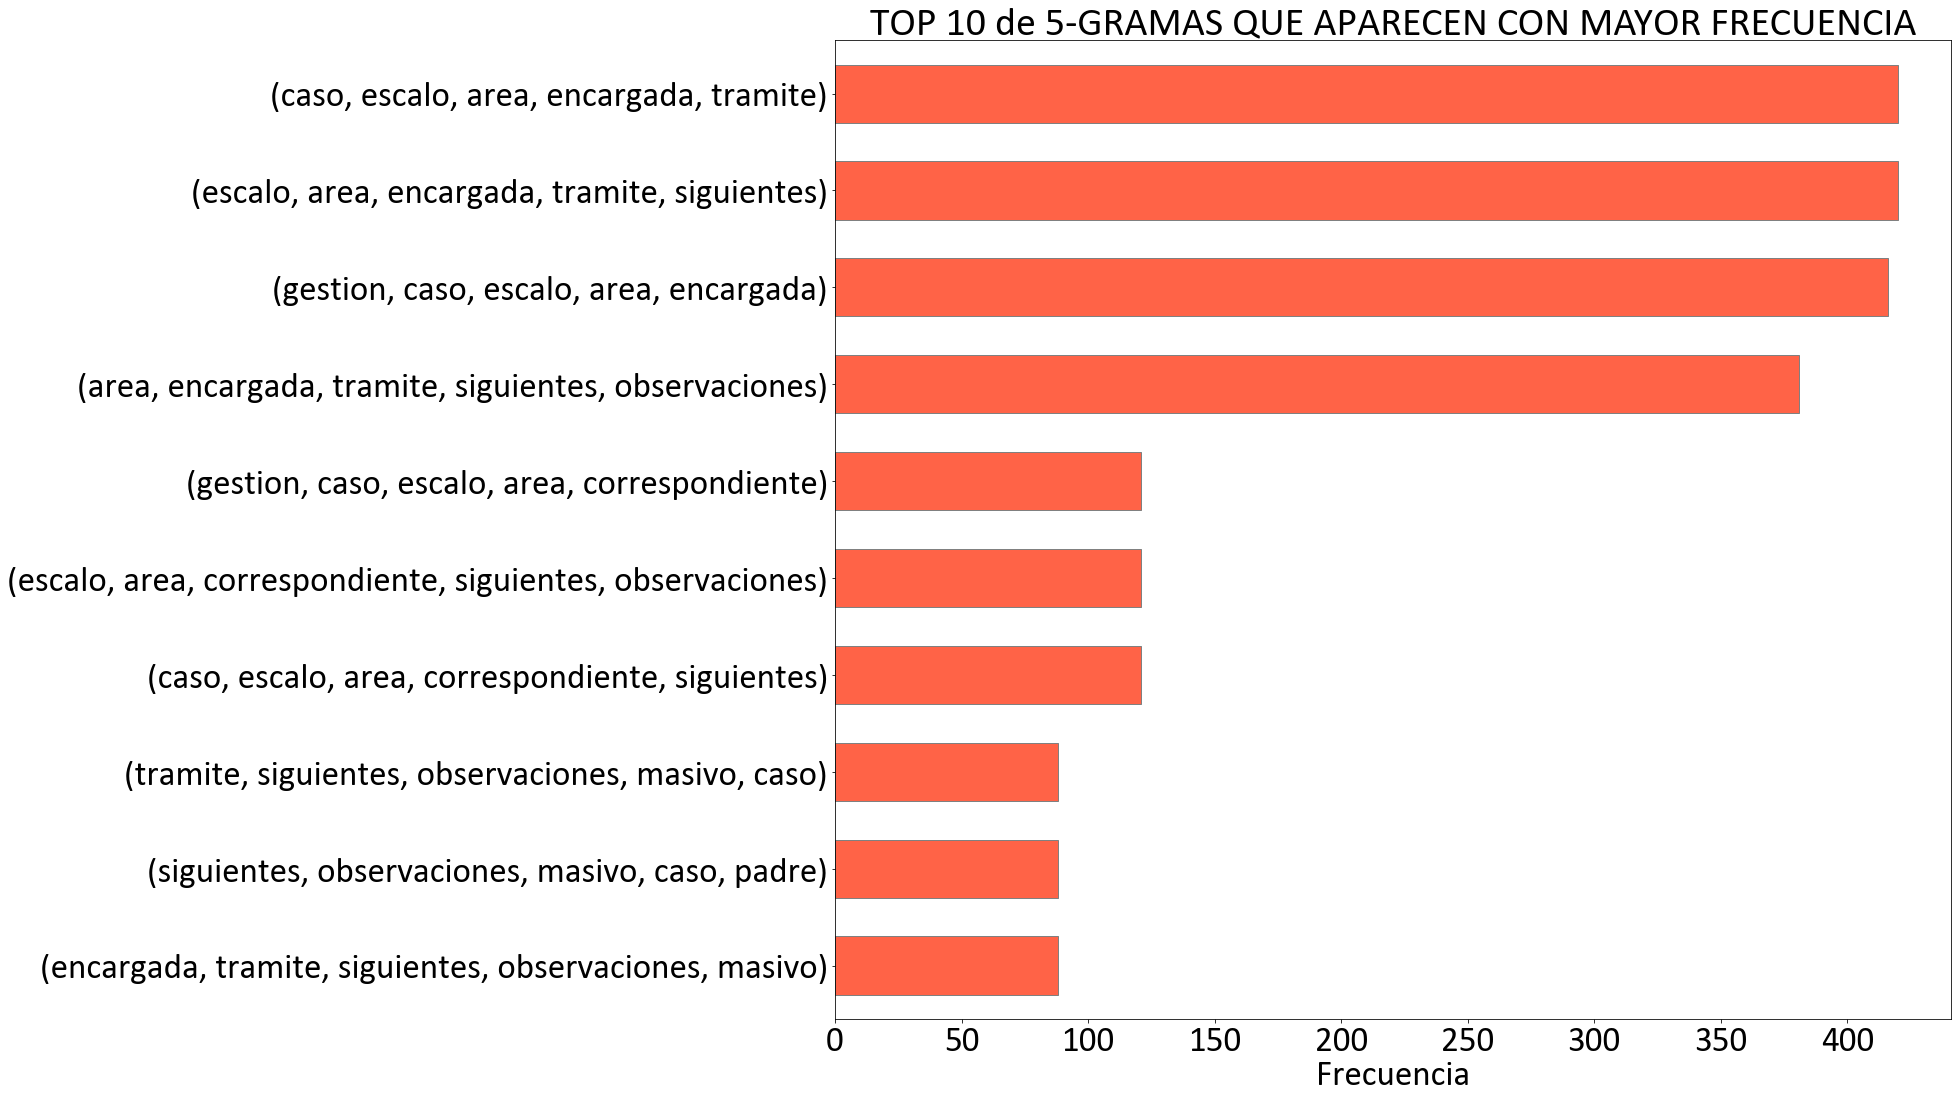

<Figure size 1080x720 with 0 Axes>

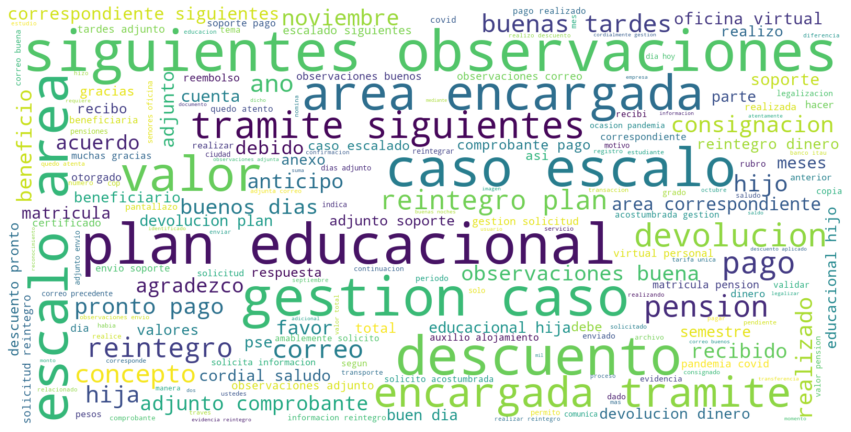

(siguientes, observaciones)    189
(plan, educacional)            183
(gestion, caso)                173
(caso, escalo)                 167
(escalo, area)                 166
(area, encargada)              135
(tramite, siguientes)          131
(encargada, tramite)           131
(reintegro, plan)               66
(buenas, tardes)                55
dtype: int64
(caso, escalo, area)                    166
(gestion, caso, escalo)                 152
(escalo, area, encargada)               135
(encargada, tramite, siguientes)        131
(area, encargada, tramite)              131
(tramite, siguientes, observaciones)    131
(reintegro, plan, educacional)           61
(siguientes, observaciones, buenas)      35
(escalo, area, correspondiente)          31
(area, correspondiente, siguientes)      31
dtype: int64
(gestion, caso, escalo, area)                         152
(caso, escalo, area, encargada)                       135
(area, encargada, tramite, siguientes)                131
(escalo, a

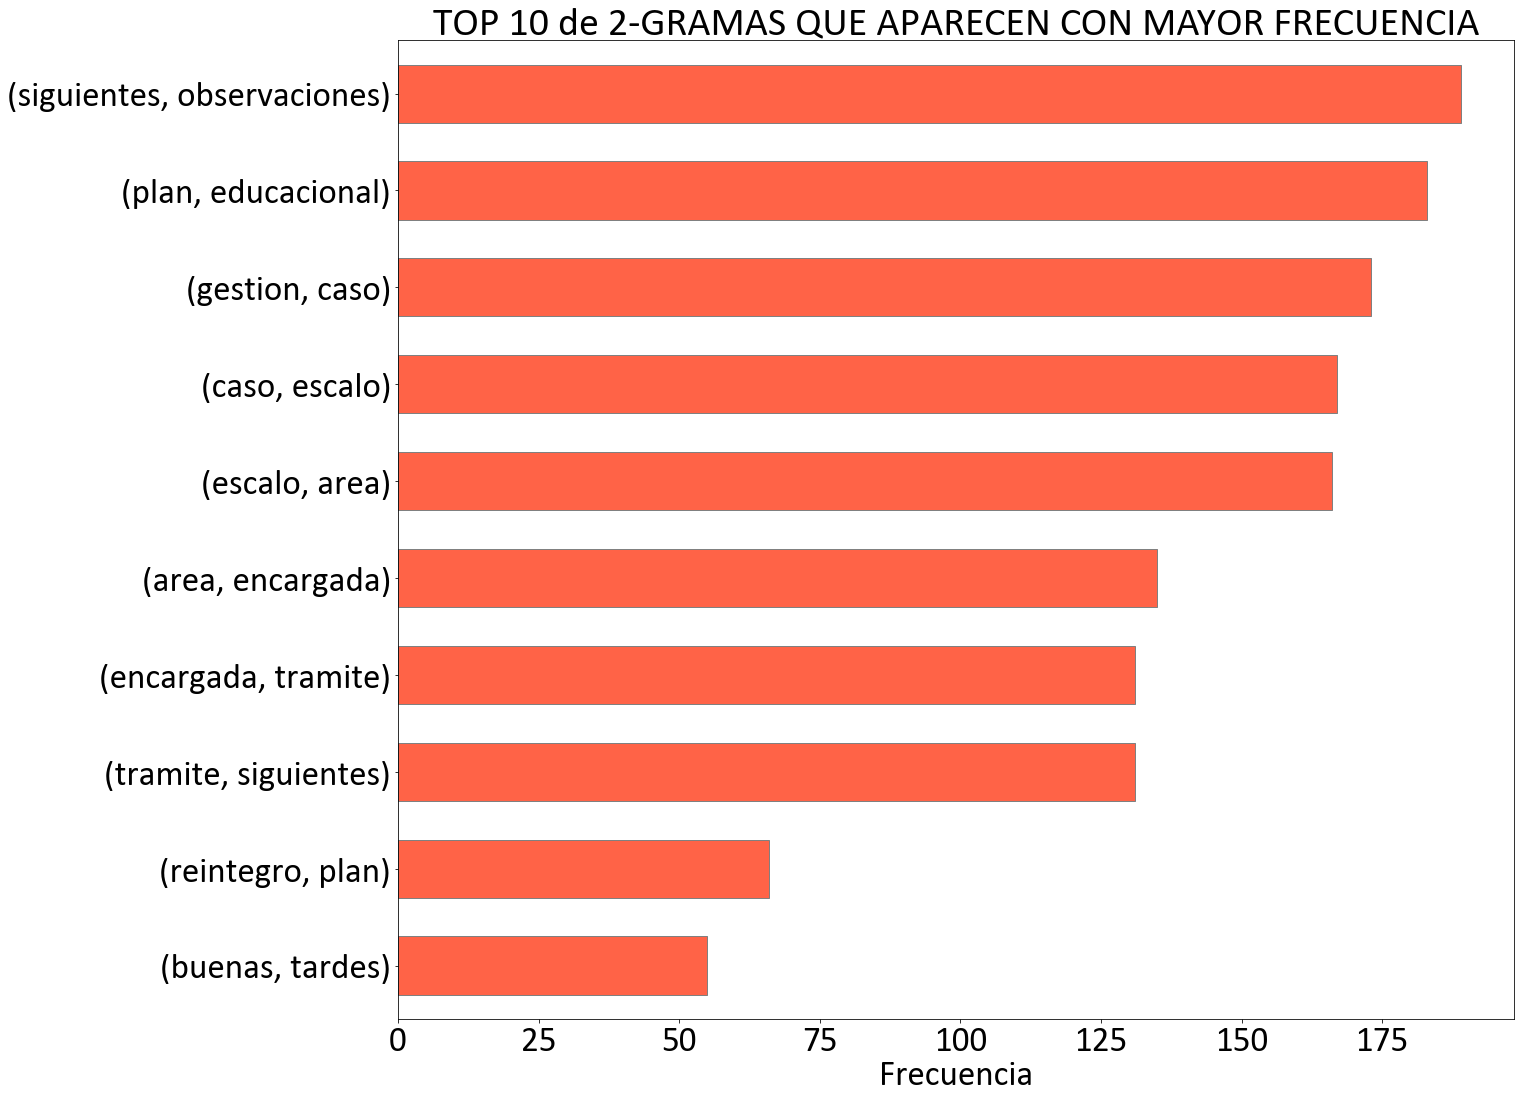

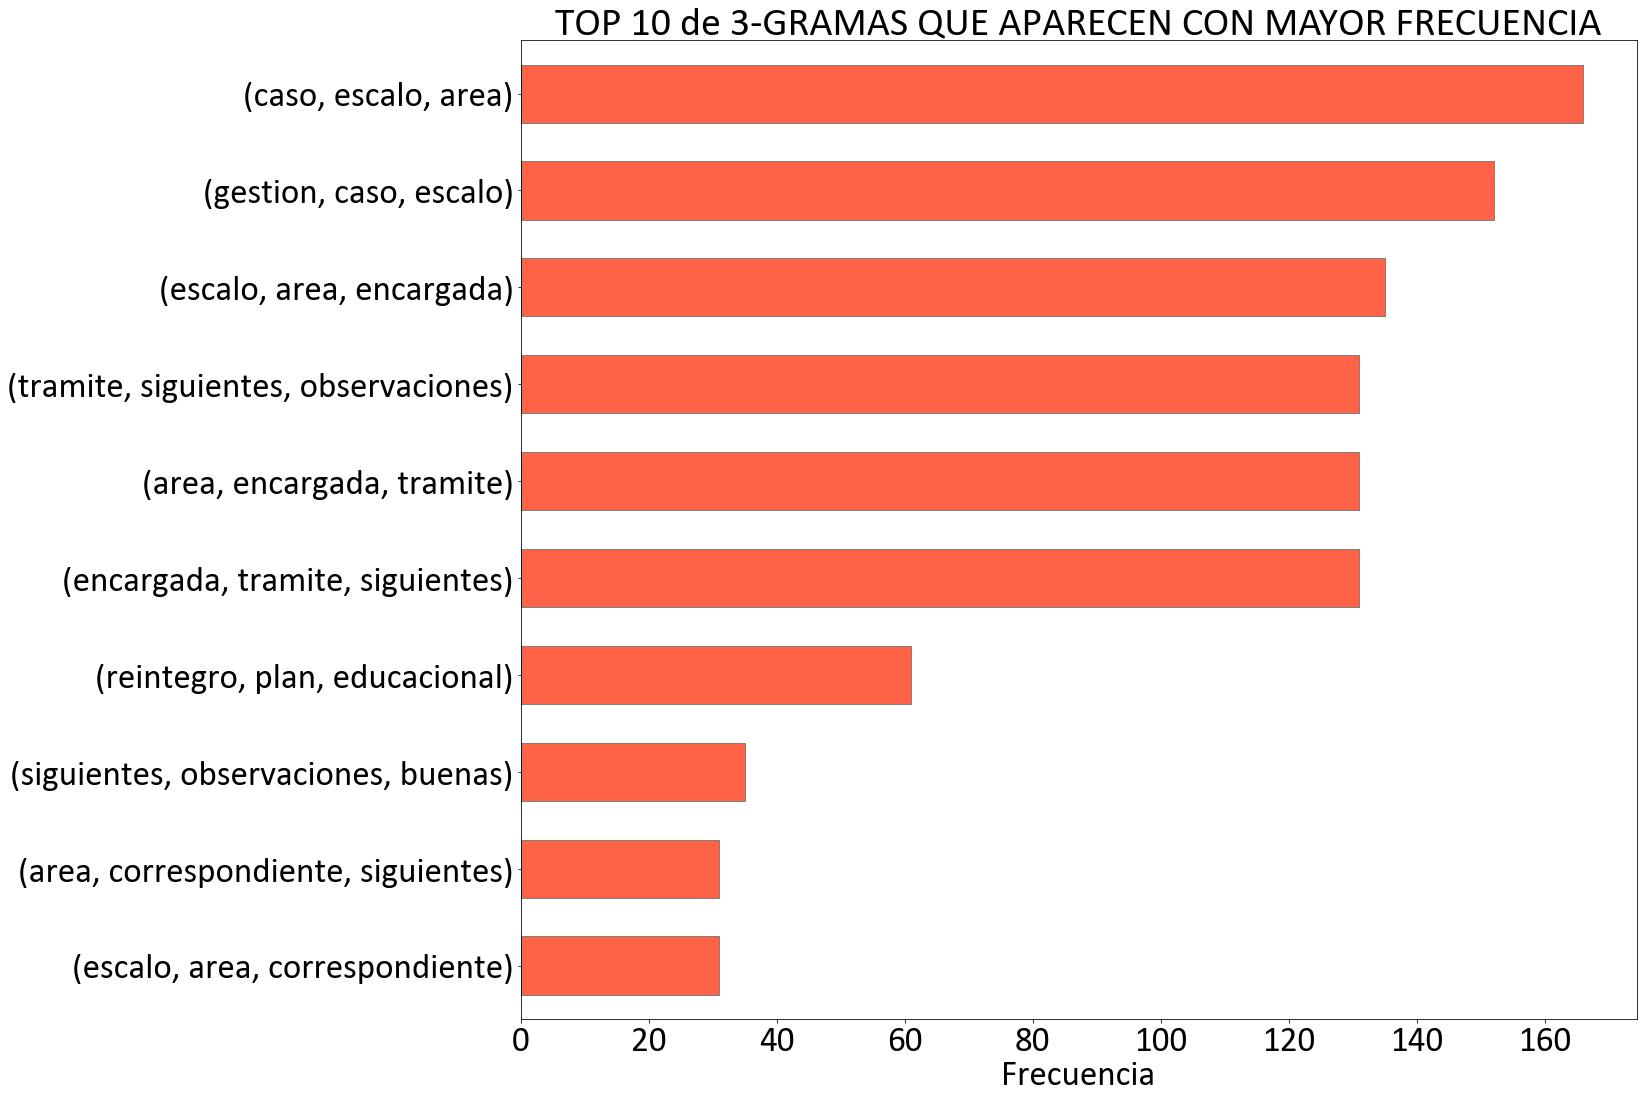

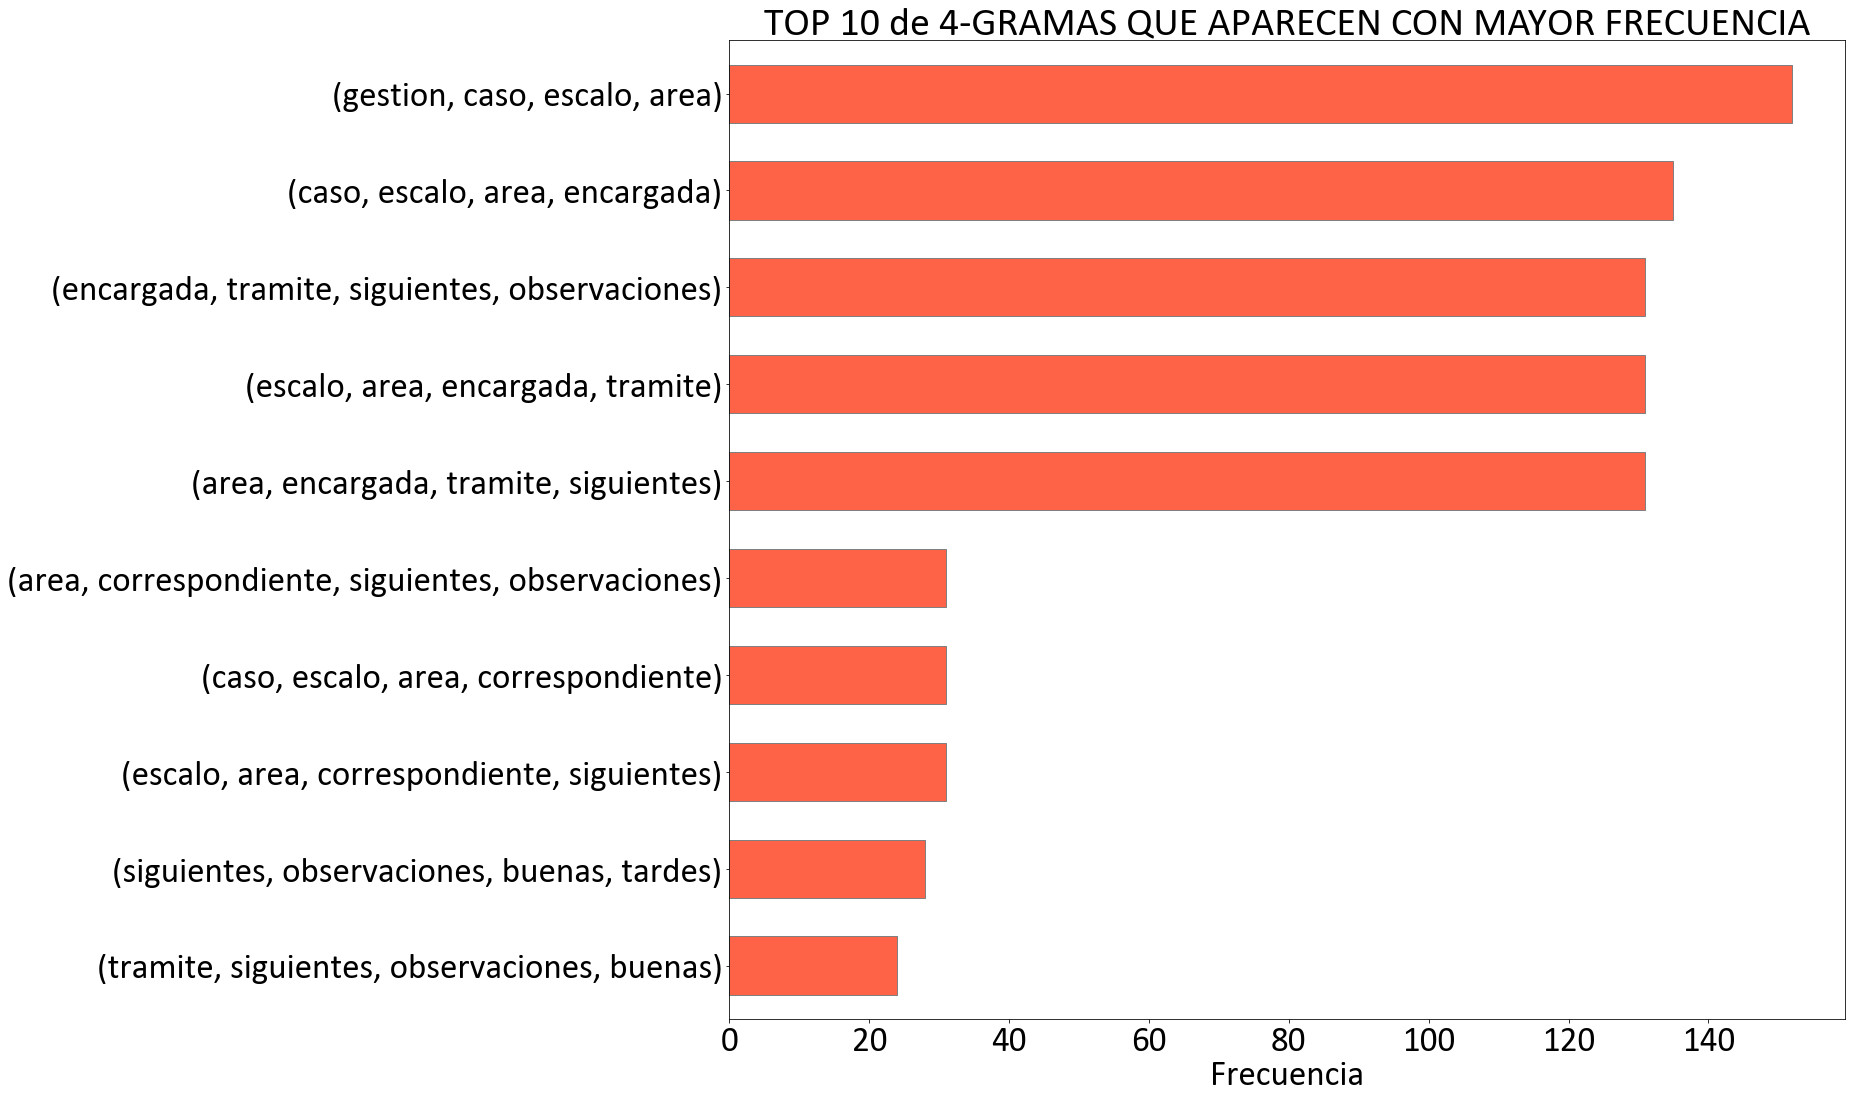

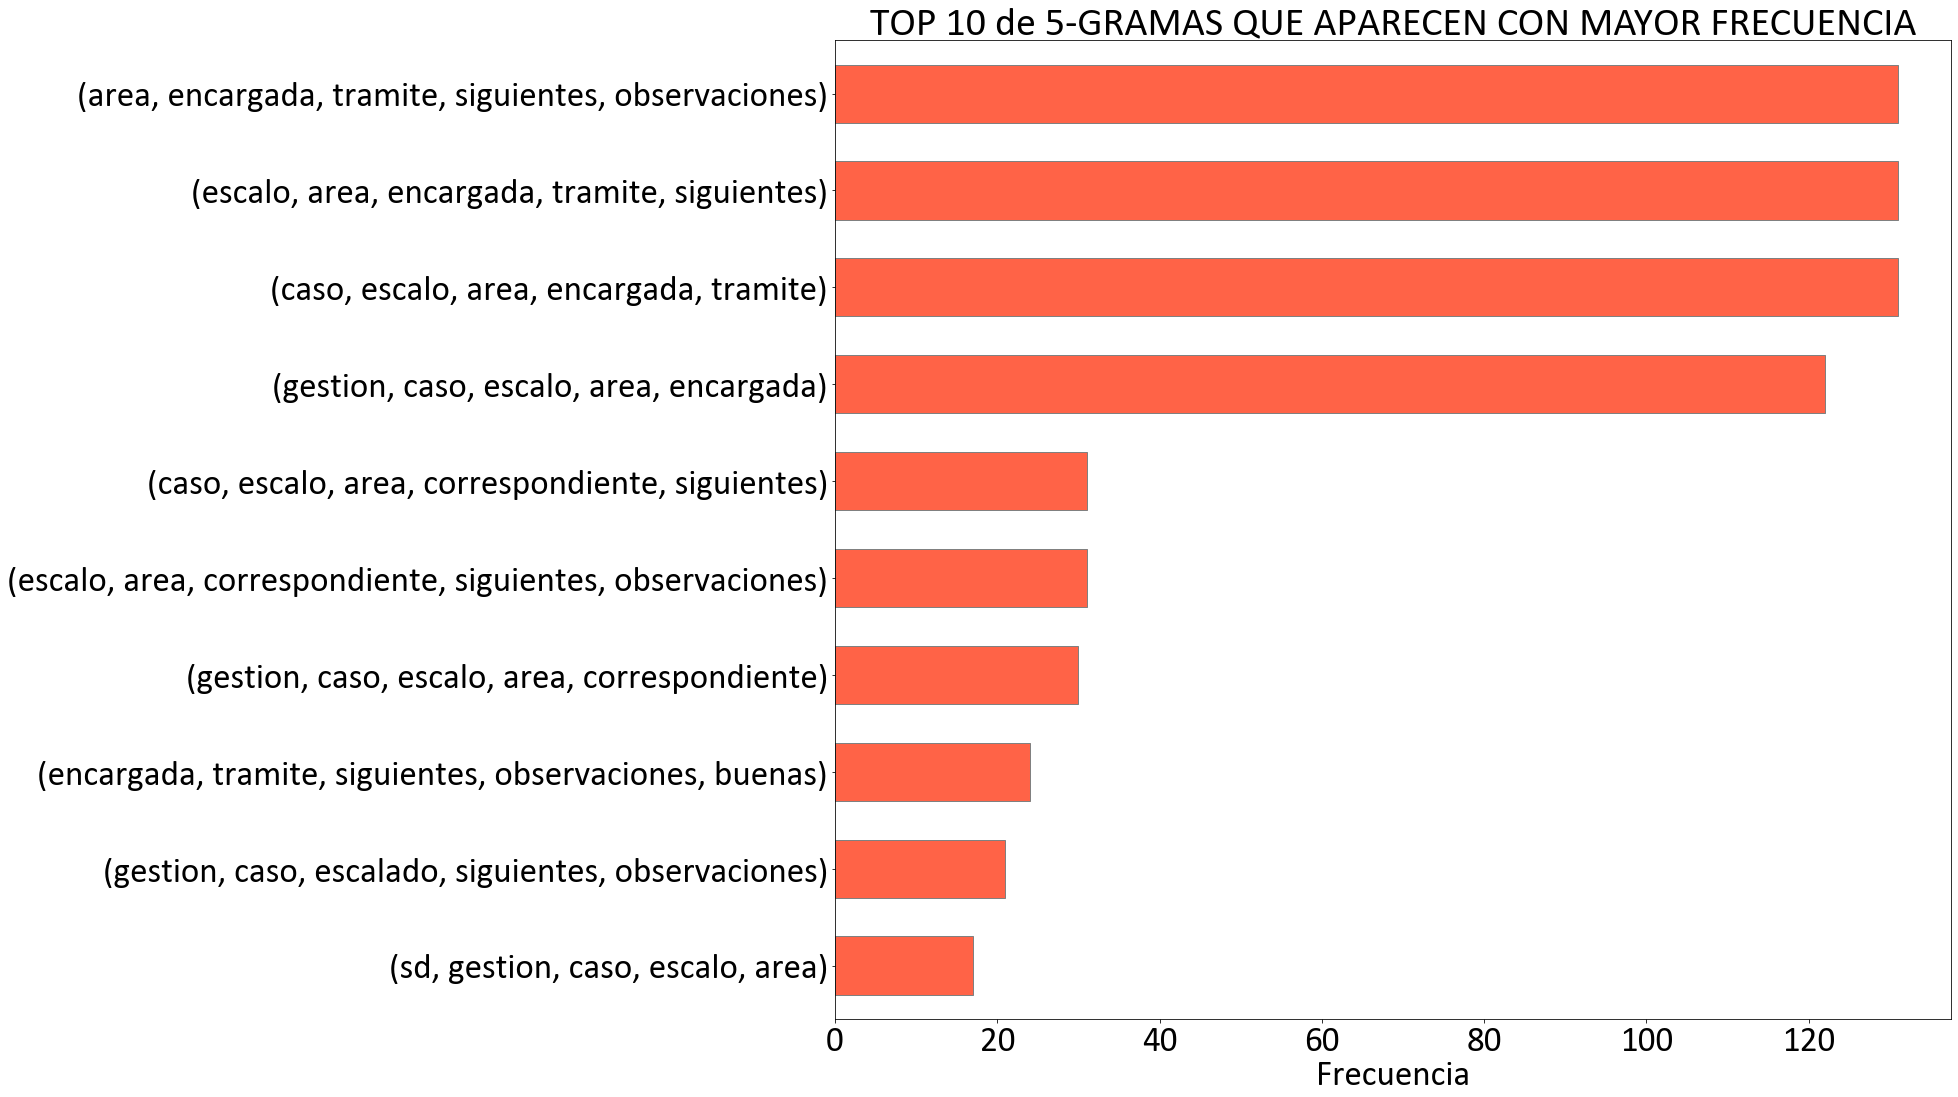

<Figure size 1080x720 with 0 Axes>

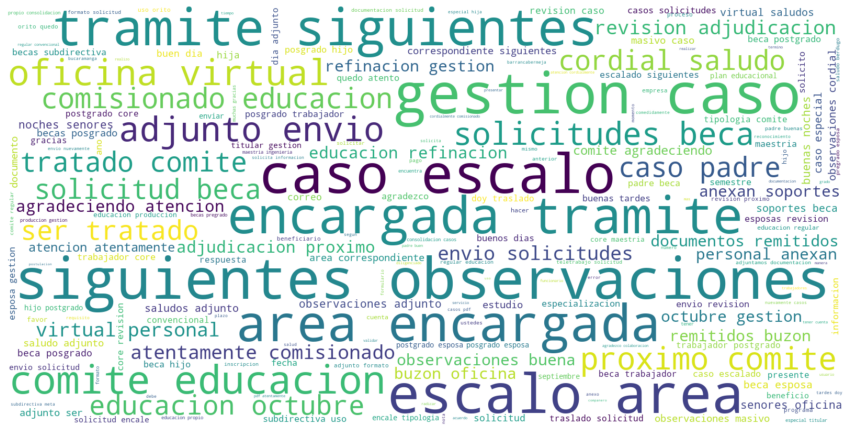

(siguientes, observaciones)    284
(gestion, caso)                281
(caso, escalo)                 261
(escalo, area)                 261
(encargada, tramite)           228
(tramite, siguientes)          228
(area, encargada)              228
(comite, educacion)            131
(oficina, virtual)             105
(adjunto, envio)                95
dtype: int64
(caso, escalo, area)                    261
(gestion, caso, escalo)                 259
(encargada, tramite, siguientes)        228
(area, encargada, tramite)              228
(escalo, area, encargada)               228
(tramite, siguientes, observaciones)    228
(comite, educacion, octubre)             58
(tratado, comite, educacion)             58
(ser, tratado, comite)                   57
(adjunto, envio, solicitudes)            56
dtype: int64
(gestion, caso, escalo, area)                      259
(escalo, area, encargada, tramite)                 228
(area, encargada, tramite, siguientes)             228
(encargada, tramite

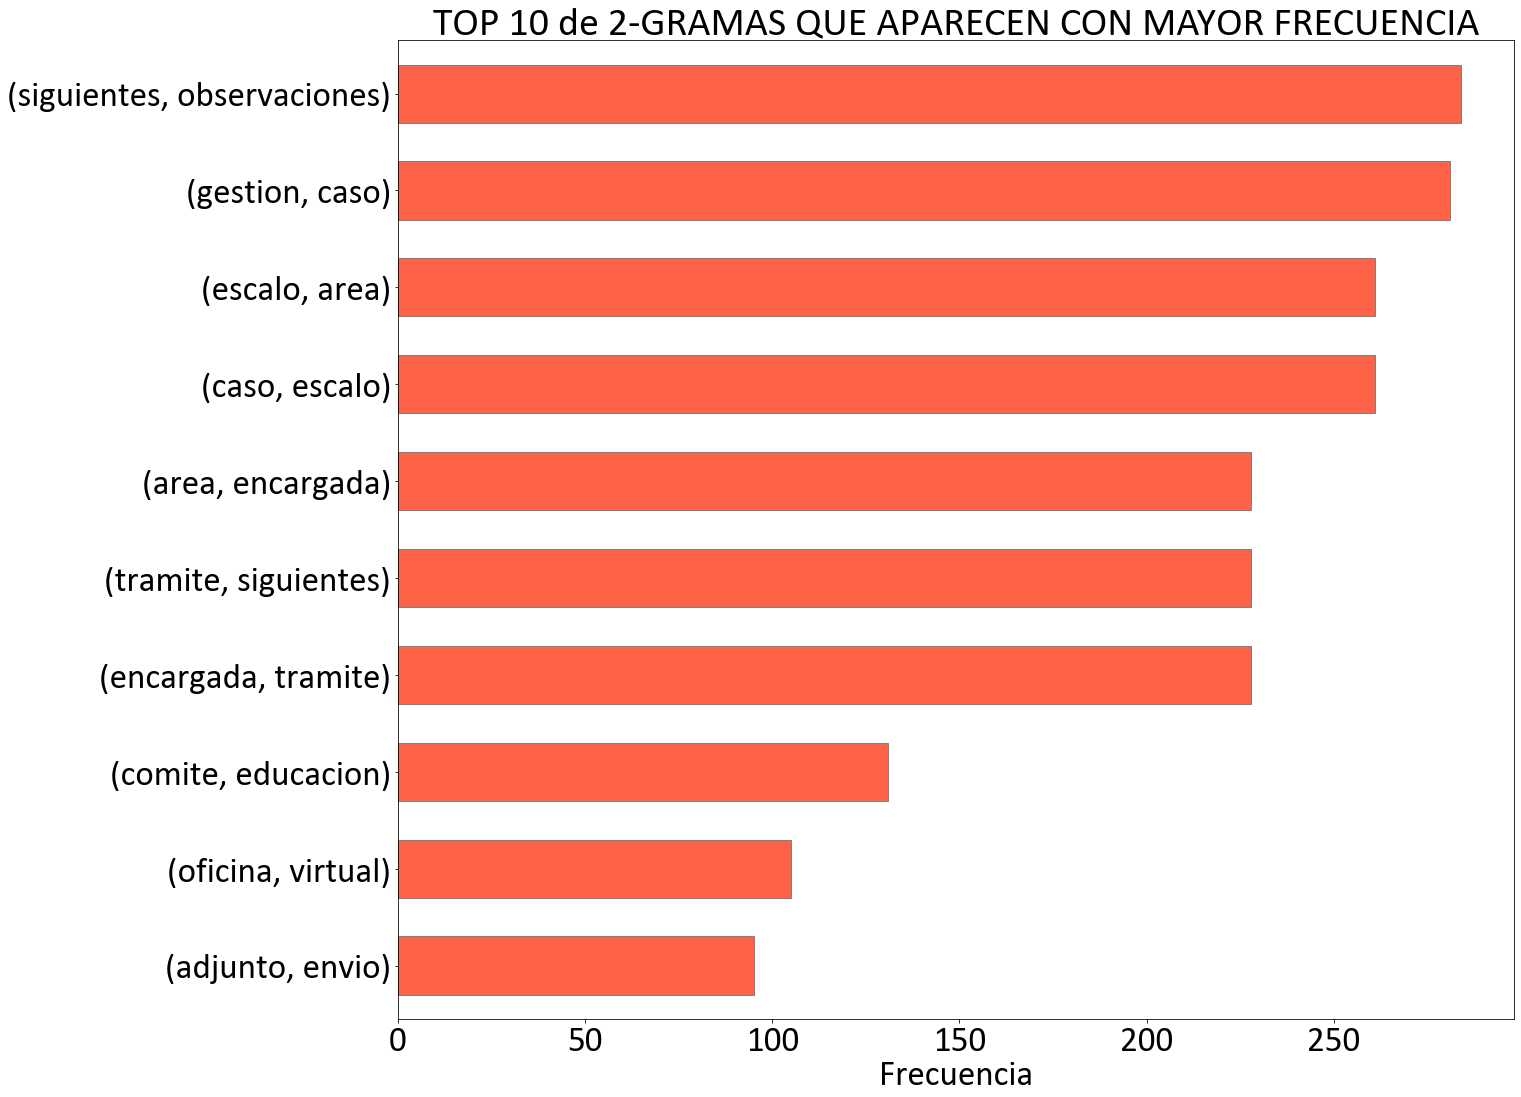

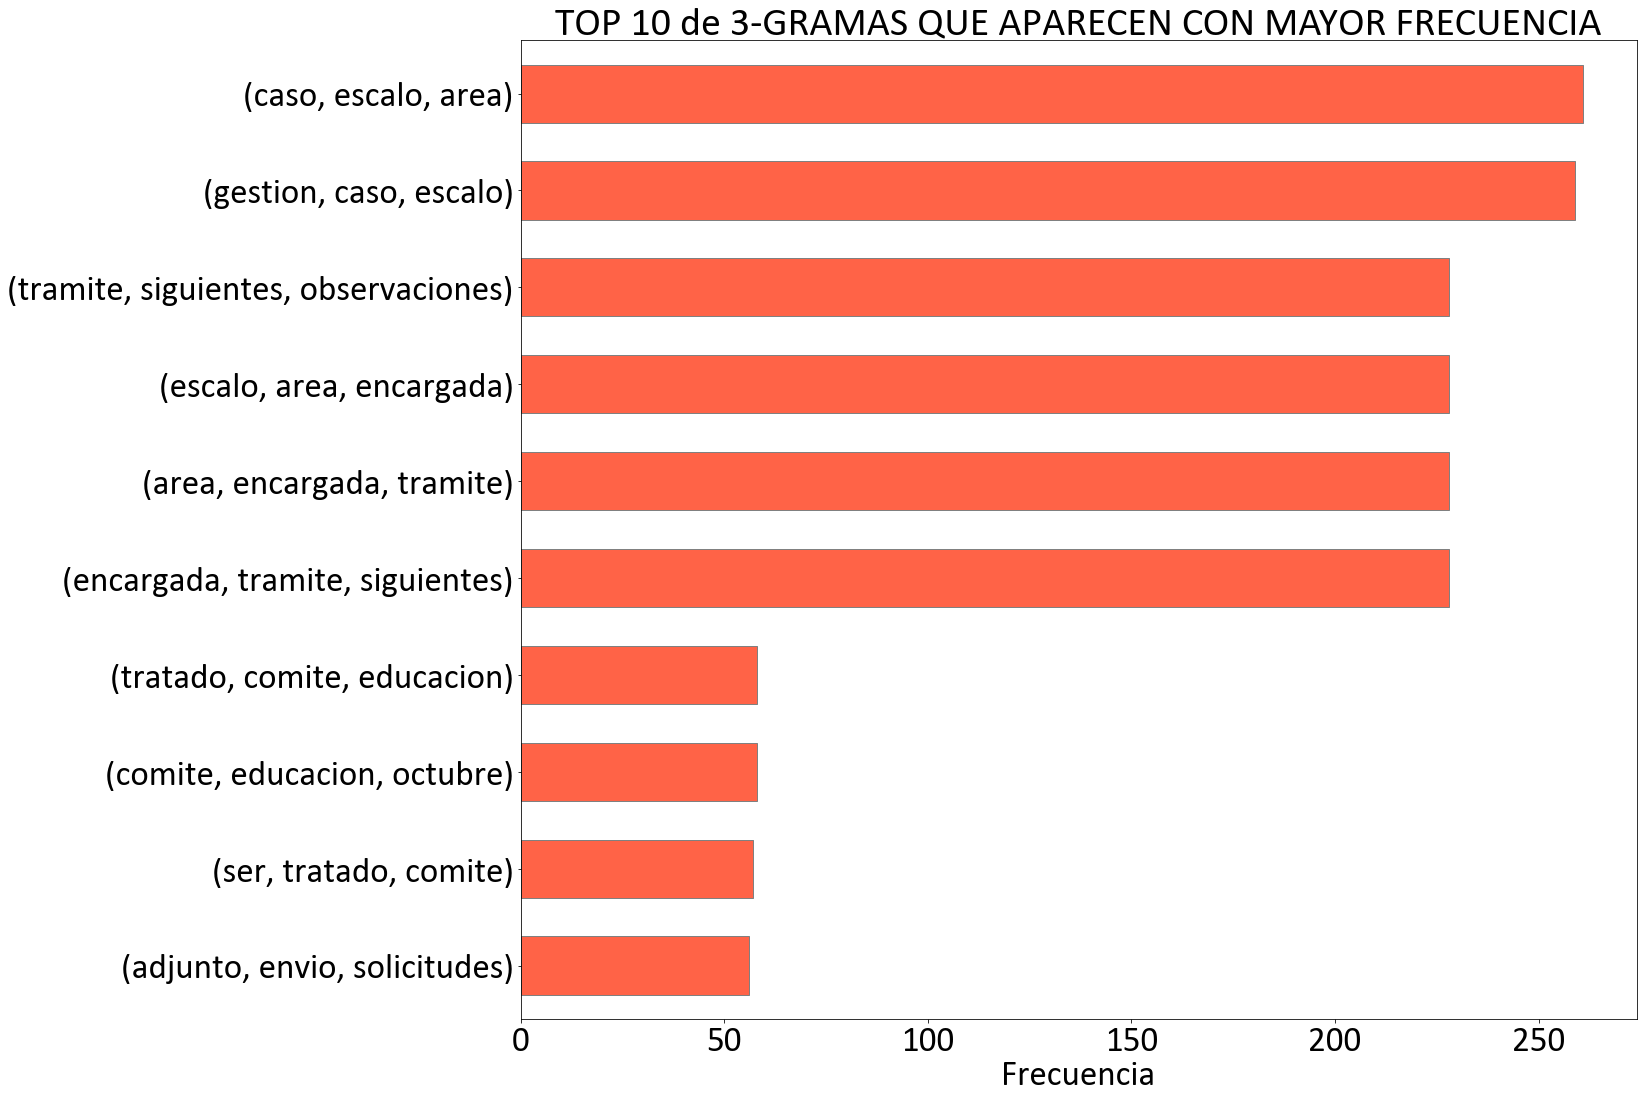

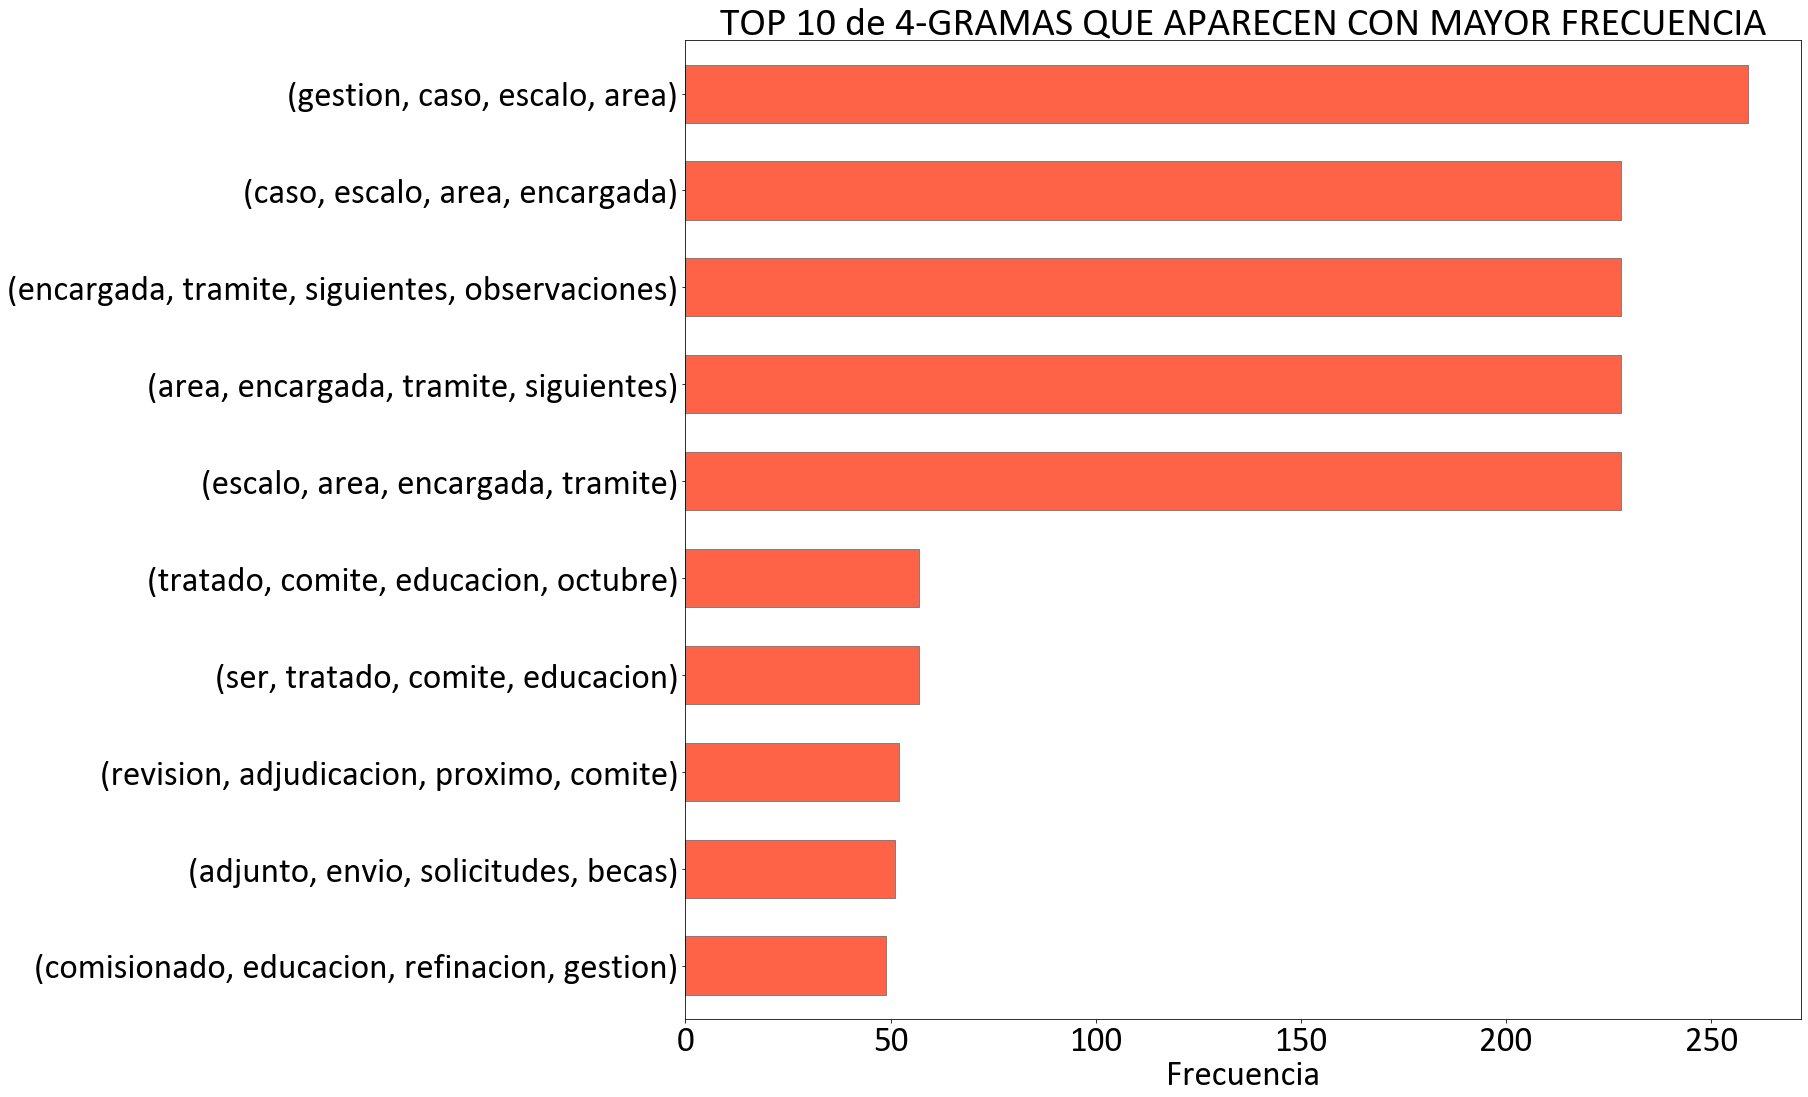

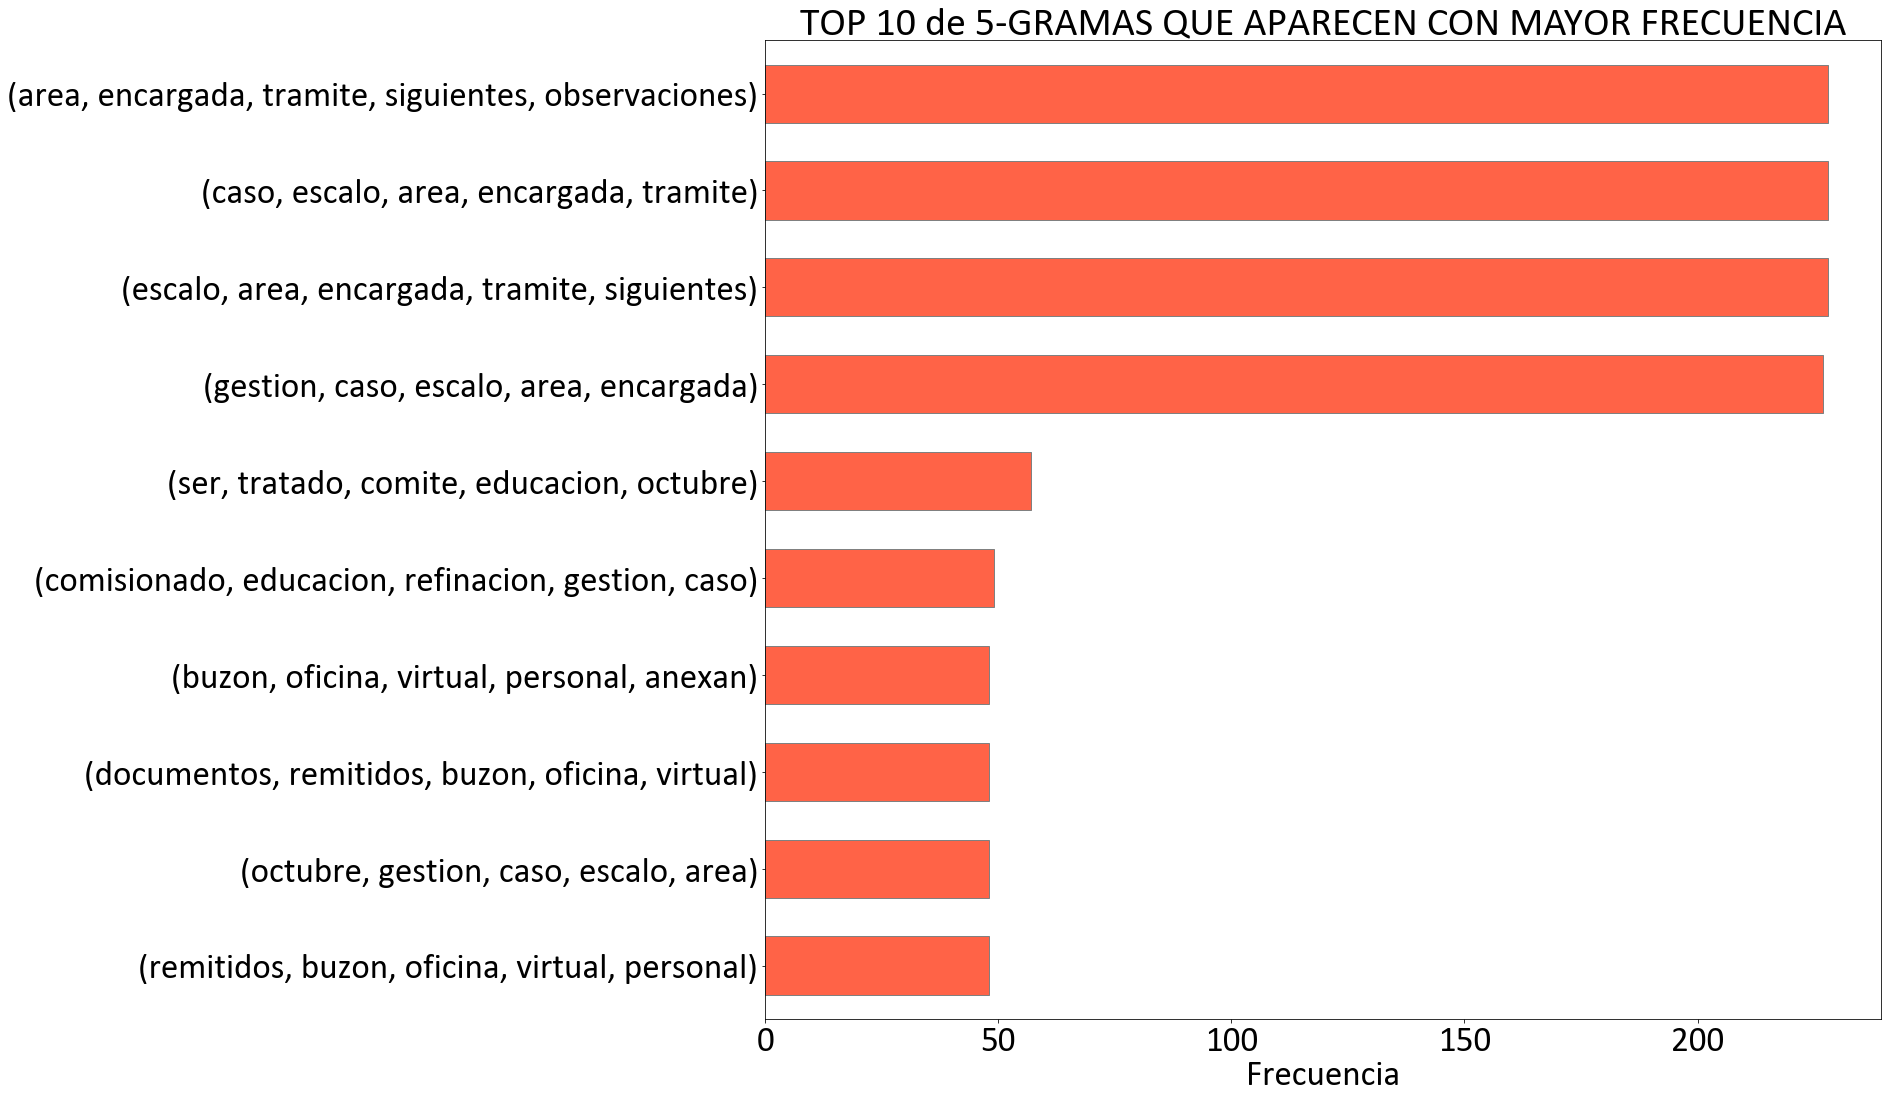

<Figure size 1080x720 with 0 Axes>

In [ ]:
for i in list(df_total['GRUPOS'].unique()):
    StopWords_total = stop_words_grupo[i] + stop_words #+ SW_grupos
    df_texto =  df_total[df_total['GRUPOS'] == i]
    #palabras = caracterizacion_palabras[caracterizacion_palabras['fgs_Nivel3'] == i].reset_index()
    texto = text(df_texto['ObservacionCreacion_limpieza2'], dic)
    print(i.upper(),' Total Registros: ',df_texto.shape[0])
    print("  ")
    print("Observaciones base")
    print(df_texto['ObservacionCreacion_limpieza1'].value_counts()[:5])
    print("  ")
    print("Observaciones reducidas")
    print(df_texto['ObservacionCreacion_limpieza2'].value_counts()[:5])
    #palabras['StopWords'].str.split(' ')[0]
    wordcloud(texto, i , StopWords_total)
    for i in range(2,6):
        print(ngrams(texto, i, 10, StopWords_total))
    print('-----------------------------------------------------------------------------------------------')
    

#**Adición de stopwords**

In [ ]:
stop_words_grupo['1. Legalización'] = ['buenas','legalizacion','plan','educacional', 'solicita, informacion', 'solicitud', 'reconocimiento', 'caso', 'escalo']
